#Initialization

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
intr = pd.read_csv('/content/drive/MyDrive/Food.com/RAW_interactions.csv')
rec = pd.read_csv('/content/drive/MyDrive/Food.com/RAW_recipes.csv')
#train = pd.read_csv('/content/drive/MyDrive/Food.com/interactions_train.csv')
#validation = pd.read_csv('/content/drive/MyDrive/Food.com/interactions_validation.csv')
#test = pd.read_csv('/content/drive/MyDrive/Food.com/interactions_test.csv')

#Data Exploration and Analysis

In [ ]:
intr.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  
2  This worked very well and is EASY.  I used not...  
3  I made the Mexican topping and took it to bunk...  
4  Made the cheddar bacon topping, adding a sprin...

In [ ]:
rec.head()

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

In [ ]:
from ast import literal_eval
# convert the tags column to list format
rec['tags'] = rec['tags'].apply(lambda x: literal_eval(str(x)))

In [ ]:
rec['tags'][0]

['60-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'north-american',
 'side-dishes',
 'vegetables',
 'mexican',
 'easy',
 'fall',
 'holiday-event',
 'vegetarian',
 'winter',
 'dietary',
 'christmas',
 'seasonal',
 'squash']

In [ ]:
all = []
for index in rec['tags'].index:
  all.append(rec['tags'][index])
all = [num for elem in all for num in elem] #flatten list
all

['60-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'north-american',
 'side-dishes',
 'vegetables',
 'mexican',
 'easy',
 'fall',
 'holiday-event',
 'vegetarian',
 'winter',
 'dietary',
 'christmas',
 'seasonal',
 'squash',
 '30-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'north-american',
 'breakfast',
 'main-dish',
 'pork',
 'american',
 'oven',
 'easy',
 'kid-friendly',
 'pizza',
 'dietary',
 'northeastern-united-states',
 'meat',
 'equipment',
 'time-to-make',
 'course',
 'preparation',
 'main-dish',
 'chili',
 'crock-pot-slow-cooker',
 'dietary',
 'equipment',
 '4-hours-or-less',
 '60-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'preparation',
 'occasion',
 'side-dishes',
 'eggs-dairy',
 'potatoes',
 'vegetables',
 'oven',
 'easy',
 'dinner-party',
 'holiday-event',
 'easter',
 'cheese',
 'stove-top',
 'dietary',
 'christmas',
 'new-ye

In [ ]:
from collections import Counter
Counter(all)

Counter({'60-minutes-or-less': 69990,
         'time-to-make': 225326,
         'course': 218148,
         'main-ingredient': 170446,
         'cuisine': 91165,
         'preparation': 230546,
         'occasion': 114145,
         'north-american': 48479,
         'side-dishes': 26902,
         'vegetables': 53814,
         'mexican': 6694,
         'easy': 126062,
         'fall': 7754,
         'holiday-event': 34920,
         'vegetarian': 35651,
         'winter': 7654,
         'dietary': 165091,
         'christmas': 8145,
         'seasonal': 21933,
         'squash': 3696,
         '30-minutes-or-less': 55077,
         'breakfast': 13655,
         'main-dish': 71786,
         'pork': 12692,
         'american': 31179,
         'oven': 31180,
         'kid-friendly': 27074,
         'pizza': 1505,
         'northeastern-united-states': 2566,
         'meat': 56042,
         'equipment': 70436,
         'chili': 1693,
         'crock-pot-slow-cooker': 6608,
         '4-hours-or-l

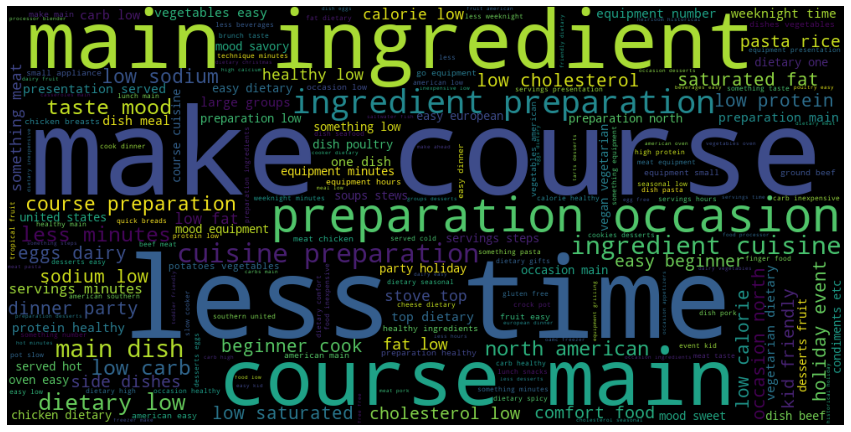

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(all)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
from collections import Counter
Counter(intr.rating)

Counter({4: 187360, 5: 816364, 0: 60847, 2: 14123, 3: 40855, 1: 12818})

In [ ]:
rec['ingredients'].to_numpy()[0]

"['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']"

In [ ]:
unique, counts = np.unique(rec['ingredients'].to_numpy(), return_counts=True)
print(np.asarray((unique, counts)).T)

[['["baker\'s angel flake sweetened coconut", \'shake-n-bake\', \'curry powder\', \'ground red pepper\', \'egg\', \'raw shrimp\', \'orange marmalade\', \'rice wine vinegar\', \'crushed red pepper flakes\']'
  1]
 ['["baker\'s german\'s chocolate", \'butter\', \'cream cheese\', \'sugar\', \'egg\', \'all-purpose flour\', \'vanilla\', \'eggs\', \'baking powder\', \'salt\', \'unsifted all-purpose flour\', \'nuts\', \'almond extract\']'
  1]
 ['["baker\'s german\'s chocolate", \'milk\', \'cream cheese\', \'sugar\', \'whipped topping\', \'graham cracker pie crust\']'
  1]
 ...
 ["['zwieback toast', 'butter', 'granulated sugar', 'cream cheese', 'eggs', 'egg yolks', 'lemon zest', 'fresh lemon juice', 'sour cream', 'vanilla', 'egg whites', 'sugar', 'strawberries', 'red currant jelly']"
  1]
 ["['zwieback toast', 'granulated sugar', 'butter', 'cream cheese', 'brown sugar', 'eggs', 'pumpkin', 'pumpkin pie spice', 'heavy cream', 'walnuts']"
  1]
 ["['zwieback toast', 'light brown sugar', 'butter',

In [ ]:
rec

id  minutes                                               tags  \
0       137739       55  ['60-minutes-or-less', 'time-to-make', 'course...   
1        31490       30  ['30-minutes-or-less', 'time-to-make', 'course...   
2       112140      130  ['time-to-make', 'course', 'preparation', 'mai...   
3        59389       45  ['60-minutes-or-less', 'time-to-make', 'course...   
4        44061      190  ['weeknight', 'time-to-make', 'course', 'main-...   
...        ...      ...                                                ...   
231632  486161       60  ['ham', '60-minutes-or-less', 'time-to-make', ...   
231633  493372        5  ['15-minutes-or-less', 'time-to-make', 'course...   
231634  308080       40  ['60-minutes-or-less', 'time-to-make', 'course...   
231635  298512       29  ['30-minutes-or-less', 'time-to-make', 'course...   
231636  298509       20  ['30-minutes-or-less', 'time-to-make', 'course...   

                                          nutrition  n_steps  n_ingredients  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11              7   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9              6   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6             13   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11             11   
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5              8   
...                                             ...      ...            ...   
231632  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7             22   
231633        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1             13   
231634         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7              8   
231635    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9             10   
231636     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5              7   

       calories total fat   sugar sodium protein saturated fat carbohydrates  
0          51.5       0.0    13.0    0.0     2.0           0.0           4.0  
1         173.4      18.0     0.0   17.0    22.0          35.0           1.0  
2         269.8      22.0    32.0   48.0    39.0          27.0           5.0  
3         368.1      17.0    10.0    2.0    14.0           8.0          20.0  
4         352.9       1.0   337.0   23.0     3.0           0.0          28.0  
...         ...       ...     ...    ...     ...           ...           ...  
231632    415.2      26.0    34.0   26.0    44.0          21.0          15.0  
231633     14.8       0.0     2.0   58.0     1.0           0.0           1.0  
231634     59.2       6.0     2.0    3.0     6.0           5.0           0.0  
231635    188.0      11.0    57.0   11.0     7.0          21.0           9.0  
231636    174.9      14.0    33.0    4.0     4.0          11.0           6.0  

[231637 rows x 13 columns]

In [ ]:
mean = rec[['minutes', 'n_steps', 'n_ingredients']].mean().to_frame()
mean.rename(columns={0: 'mean'})

mean
minutes        9398.546009
n_steps           9.765499
n_ingredients     9.051153

In [ ]:
#Rating per utente
Counter(intr.groupby(['user_id']).count()['recipe_id'])

Counter({128: 10,
         794: 1,
         1: 166256,
         60: 35,
         31: 139,
         2: 22738,
         4: 5144,
         37: 84,
         18: 345,
         7: 1937,
         8: 1461,
         12: 755,
         42: 75,
         417: 1,
         193: 4,
         5: 3421,
         6: 2566,
         57: 42,
         38: 92,
         3: 9346,
         11: 842,
         69: 33,
         201: 9,
         9: 1215,
         258: 3,
         629: 2,
         2739: 1,
         80: 20,
         55: 36,
         245: 5,
         40: 81,
         26: 192,
         1741: 1,
         28: 157,
         14: 552,
         36: 92,
         710: 1,
         1455: 3,
         10: 1040,
         89: 17,
         45: 70,
         361: 4,
         20: 298,
         125: 13,
         13: 636,
         30: 143,
         374: 1,
         19: 325,
         21: 260,
         22: 269,
         107: 12,
         16: 435,
         27: 171,
         228: 3,
         34: 113,
         76: 34,
         41:

In [ ]:
intr.groupby(['user_id'])['recipe_id'].count().sort_values(ascending=False).to_frame()

recipe_id
user_id              
424680           7671
37449            5603
383346           4628
169430           4076
128473           3917
...               ...
1361437             1
1361458             1
1361463             1
1361497             1
2002372706          1

[226570 rows x 1 columns]

In [ ]:
intr.groupby(['recipe_id'])['user_id'].count().sort_values(ascending=False).to_frame()

user_id
recipe_id         
2886          1613
27208         1601
89204         1579
39087         1448
67256         1322
...            ...
307214           1
176578           1
176579           1
176581           1
537716           1

[231637 rows x 1 columns]

In [ ]:
#Average number of ratings per user
np.mean(intr.groupby(['user_id']).count()['recipe_id'])

4.997868208500684

Funzione di aggregazione: somma
Sommiamo i

In [ ]:
rec

In [ ]:
rec['n_steps'].describe()

count    231637.000000
mean          9.765499
std           5.995128
min           0.000000
25%           6.000000
50%           9.000000
75%          12.000000
max         145.000000
Name: n_steps, dtype: float64

I piatti del dataset hanno una media di circa 10 steps

Abbiamo una media di 9 minuti

In [ ]:
rec['minutes'].sum() / 231637

9398.546009488984

In [ ]:
rec['minutes'].describe()

count    2.316370e+05
mean     9.398546e+03
std      4.461963e+06
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      2.147484e+09
Name: minutes, dtype: float64

In [ ]:
rec['n_ingredients'].describe()

count    231637.000000
mean          9.051153
std           3.734796
min           1.000000
25%           6.000000
50%           9.000000
75%          11.000000
max          43.000000
Name: n_ingredients, dtype: float64

9 ingredienti come media

In [ ]:
rec['minutes'].max()

2147483647

In [ ]:
intr = intr.drop(['date', 'review'], axis=1)

In [ ]:
rec.drop(['name', 'submitted', 'steps', 'description', 'contributor_id', 'ingredients'], axis=1, inplace=True)

In [ ]:
df = intr.merge(rec, left_on='recipe_id', right_on='id')
df

user_id  recipe_id  rating      id  minutes  \
0          8937      44394       4   44394       20   
1        126440      85009       5   85009       10   
2         57222      85009       5   85009       10   
3         52282     120345       4  120345       10   
4        124416     120345       0  120345       10   
...         ...        ...     ...     ...      ...   
964839   226863     249924       5  249924       70   
964840    39835     249924       5  249924       70   
964841   496803     249924       5  249924       70   
964842   116593      72730       0   72730       22   
964843   583662     386618       5  386618       21   

                                                     tags  \
0       ['30-minutes-or-less', 'time-to-make', 'course...   
1       ['15-minutes-or-less', 'time-to-make', 'course...   
2       ['15-minutes-or-less', 'time-to-make', 'course...   
3       ['15-minutes-or-less', 'time-to-make', 'course...   
4       ['15-minutes-or-less', 'time-to-make', 'course...   
...                                                   ...   
964839  ['time-to-make', 'course', 'main-ingredient', ...   
964840  ['time-to-make', 'course', 'main-ingredient', ...   
964841  ['time-to-make', 'course', 'main-ingredient', ...   
964842  ['30-minutes-or-less', 'time-to-make', 'course...   
964843  ['30-minutes-or-less', 'time-to-make', 'course...   

                                                nutrition  n_steps  \
0                [132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]        5   
1       [2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]        3   
2       [2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]        3   
3                [838.0, 1.0, 820.0, 0.0, 2.0, 0.0, 71.0]        6   
4                [838.0, 1.0, 820.0, 0.0, 2.0, 0.0, 71.0]        6   
...                                                   ...      ...   
964839         [505.9, 44.0, 19.0, 18.0, 63.0, 39.0, 8.0]        9   
964840         [505.9, 44.0, 19.0, 18.0, 63.0, 39.0, 8.0]        9   
964841         [505.9, 44.0, 19.0, 18.0, 63.0, 39.0, 8.0]        9   
964842       [1941.7, 3.0, 1569.0, 3.0, 10.0, 1.0, 154.0]        6   
964843           [124.7, 1.0, 11.0, 24.0, 10.0, 0.0, 8.0]        9   

        n_ingredients  
0                   4  
1                  13  
2                  13  
3                   2  
4                   2  
...               ...  
964839              5  
964840              5  
964841              5  
964842              6  
964843              8  

[964844 rows x 9 columns]

(-10.0, 50.0)

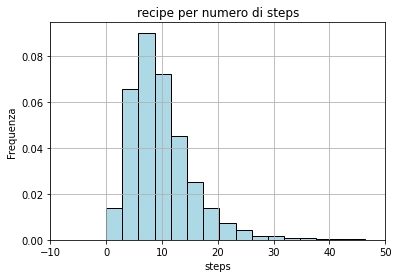

In [ ]:
rec.n_steps.hist(bins=50,
edgecolor='k',
facecolor='lightblue',
density=True)
plt.title('recipe per numero di steps')
plt.xlabel('steps')
plt.ylabel('Frequenza')
plt.xlim((-10, 50))

Da questo si evince che le ricette con non troppi steps sono quelle più presenti



(-10.0, 50.0)

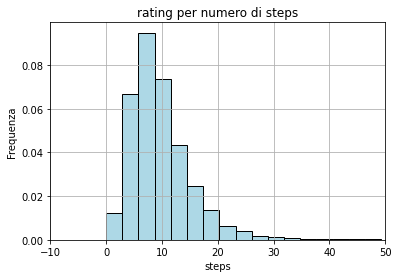

In [ ]:
df.n_steps.hist(bins=50,
edgecolor='k',
facecolor='lightblue',
density=True)
plt.title('rating per numero di steps')
plt.xlabel('steps')
plt.ylabel('Frequenza')
plt.xlim((-10, 50))

(-10.0, 30.0)

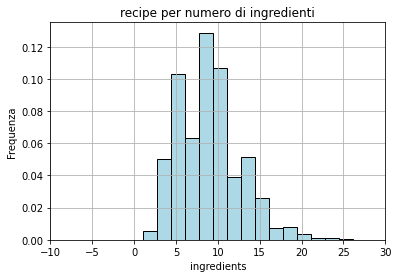

In [ ]:
rec.n_ingredients.hist(bins = 25,
edgecolor='k',
facecolor='lightblue',
density=True)
plt.title('recipe per numero di ingredienti')
plt.xlabel('ingredients')
plt.ylabel('Frequenza')
plt.xlim((-10, 30))

(-10.0, 30.0)

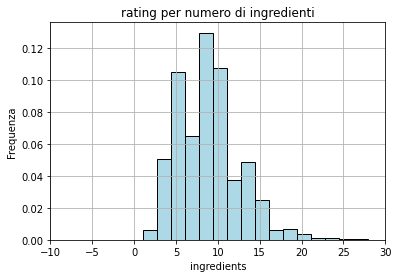

In [ ]:
df.n_ingredients.hist(bins = 25,
edgecolor='k',
facecolor='lightblue',
density=True)
plt.title('rating per numero di ingredienti')
plt.xlabel('ingredients')
plt.ylabel('Frequenza')
plt.xlim((-10, 30))

In [ ]:
rec['calories'].describe()

count     231637
unique     21479
top        105.0
freq          70
Name: calories, dtype: object

In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
intr['recipe_id'].value_counts()

2886      1613
27208     1601
89204     1579
39087     1448
67256     1322
          ... 
155682       1
154055       1
252960       1
144013       1
386618       1
Name: recipe_id, Length: 231637, dtype: int64

In [ ]:
rec[rec['id'] == 2886]

id  minutes                                               tags  \
22168  2886       65  ['time-to-make', 'course', 'main-ingredient', ...   

                                        nutrition  n_steps  n_ingredients  
22168  [272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]       13              8

In [ ]:
df.rename(columns = {'user_id':'users', 'recipe_id':'recipes'}, inplace = True)

In [ ]:
df.value_counts()

In [ ]:
for x in intr['recipe_id']:
  if (x == 40):
    print(x)

40
40
40
40
40
40
40
40
40


In [ ]:
df.corr()

user_id  recipe_id    rating        id   minutes   n_steps  \
user_id        1.000000   0.100059 -0.196180  0.100059  0.000595  0.051686   
recipe_id      0.100059   1.000000 -0.013570  1.000000  0.003164  0.056699   
rating        -0.196180  -0.013570  1.000000 -0.013570  0.001053 -0.021169   
id             0.100059   1.000000 -0.013570  1.000000  0.003164  0.056699   
minutes        0.000595   0.003164  0.001053  0.003164  1.000000 -0.000438   
n_steps        0.051686   0.056699 -0.021169  0.056699 -0.000438  1.000000   
n_ingredients  0.008134   0.018120 -0.003529  0.018120 -0.001059  0.380295   

               n_ingredients  
user_id             0.008134  
recipe_id           0.018120  
rating             -0.003529  
id                  0.018120  
minutes            -0.001059  
n_steps             0.380295  
n_ingredients       1.000000

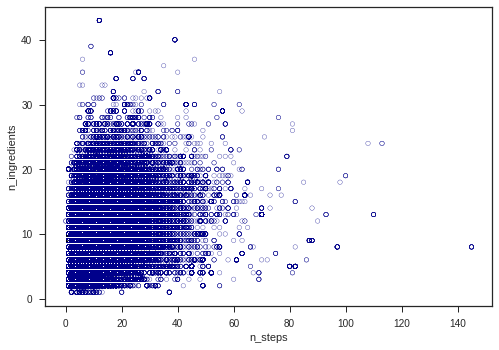

In [ ]:
plt.style.use('seaborn-notebook')
plt.style.use('seaborn-white')
plt.style.use('seaborn-ticks')
df.plot(kind='scatter', x='n_steps', y='n_ingredients', c='none',edgecolor='darkblue')
plt.plot([df.n_steps.mean(), df.n_steps.mean()], 'k:')
plt.plot([df.n_ingredients.mean(), df.n_ingredients.mean()], 'k:')

In [ ]:
np.cov(df.n_steps, df.n_ingredients)

array([[33.8687806 ,  8.16650501],
       [ 8.16650501, 13.61542122]])

In [ ]:
np.corrcoef(df.n_ingredients, df.n_steps)

array([[1.        , 0.38029526],
       [0.38029526, 1.        ]])

In [ ]:
np.corrcoef(df.minutes, df.n_ingredients)

array([[ 1.        , -0.00105893],
       [-0.00105893,  1.        ]])

In [ ]:
np.corrcoef(df.minutes, df.n_ingredients)

array([[ 1.        , -0.00105893],
       [-0.00105893,  1.        ]])

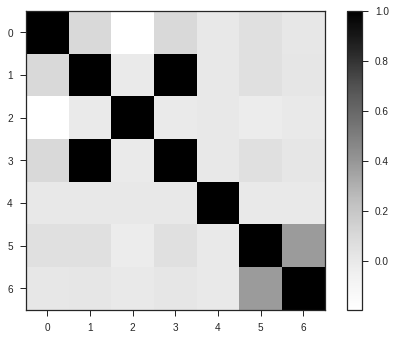

In [ ]:
plt.imshow(df.corr())
plt.colorbar()

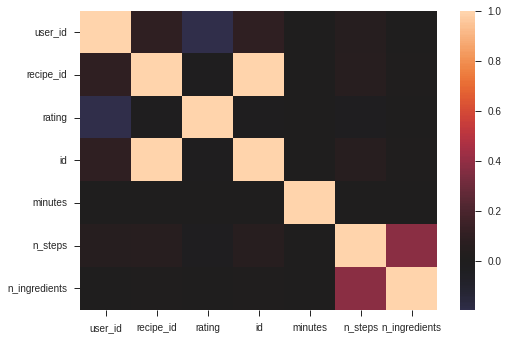

In [ ]:
sns.heatmap(df.corr(), center=0)

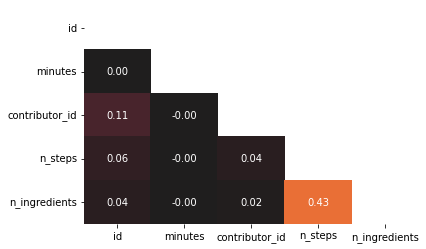

In [ ]:
sns.heatmap(rec.corr(),
vmin=-0.3,
vmax=0.6,
center=0,
annot=True,
fmt='.2f',
mask=~np.tri(rec.corr().shape[1], k=-1, dtype=bool),
cbar=False);

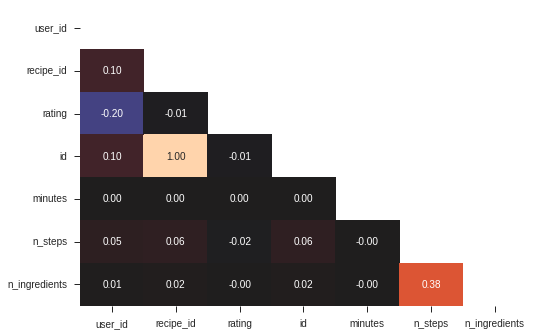

In [ ]:
sns.heatmap(df.corr(),
vmin=-0.3,
vmax=0.6,
center=0,
annot=True,
fmt='.2f',
mask=~np.tri(df.corr().shape[1], k=-1, dtype=bool),
cbar=False);

The greater the number of ingredients, the greater the steps are

In [ ]:
rec[['minutes', 'n_steps', 'n_ingredients']]

minutes  n_steps  n_ingredients
0            55       11              7
1            30        9              6
2           130        6             13
3            45       11             11
4           190        5              8
...         ...      ...            ...
231632       60        7             22
231633        5        1             13
231634       40        7              8
231635       29        9             10
231636       20        5              7

[231637 rows x 3 columns]

In [ ]:
q1 = np.percentile(rec["minutes"],25)
q3 = np.percentile(rec["minutes"],75)
IQR = q3- q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

rec = rec.drop((rec[rec["minutes"]>=upper].index | rec[rec["minutes"]<=lower].index),axis=0)

<ipython-input-6-a5ab192f4a54>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  rec = rec.drop((rec[rec["minutes"]>=upper].index | rec[rec["minutes"]<=lower].index),axis=0)


In [ ]:
q1 = np.percentile(rec["n_steps"],25)
q3 = np.percentile(rec["n_steps"],75)
IQR = q3- q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

rec = rec.drop((rec[rec["n_steps"]>=upper].index | rec[rec["n_steps"]<=lower].index),axis=0)

<ipython-input-7-d8e1096641c4>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  rec = rec.drop((rec[rec["n_steps"]>=upper].index | rec[rec["n_steps"]<=lower].index),axis=0)


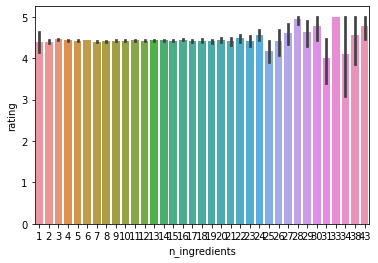

In [ ]:

sns.barplot(data=df,y="rating",x="n_ingredients")

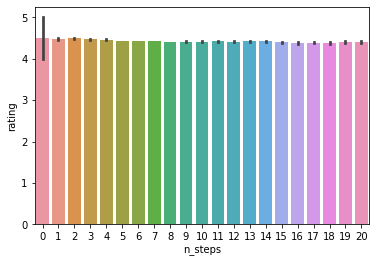

In [ ]:
sns.barplot(data=df,y="rating",x="n_steps")

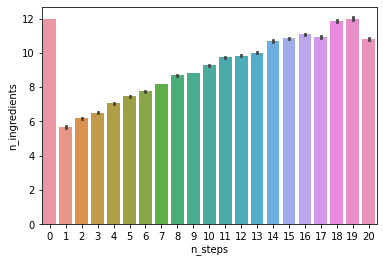

In [ ]:

sns.barplot(data=df,y="n_ingredients",x="n_steps")

In [ ]:
rec

id  minutes                                               tags  \
0       137739       55  ['60-minutes-or-less', 'time-to-make', 'course...   
1        31490       30  ['30-minutes-or-less', 'time-to-make', 'course...   
2       112140      130  ['time-to-make', 'course', 'preparation', 'mai...   
3        59389       45  ['60-minutes-or-less', 'time-to-make', 'course...   
5         5289        0  ['15-minutes-or-less', 'time-to-make', 'course...   
...        ...      ...                                                ...   
231632  486161       60  ['ham', '60-minutes-or-less', 'time-to-make', ...   
231633  493372        5  ['15-minutes-or-less', 'time-to-make', 'course...   
231634  308080       40  ['60-minutes-or-less', 'time-to-make', 'course...   
231635  298512       29  ['30-minutes-or-less', 'time-to-make', 'course...   
231636  298509       20  ['30-minutes-or-less', 'time-to-make', 'course...   

                                          nutrition  n_steps  n_ingredients  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11              7   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9              6   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6             13   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11             11   
5          [160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]        4              4   
...                                             ...      ...            ...   
231632  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7             22   
231633        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1             13   
231634         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7              8   
231635    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9             10   
231636     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5              7   

        calories  total fat  sugar  sodium  protein  saturated fat  \
0           51.5        0.0   13.0     0.0      2.0            0.0   
1          173.4       18.0    0.0    17.0     22.0           35.0   
2          269.8       22.0   32.0    48.0     39.0           27.0   
3          368.1       17.0   10.0     2.0     14.0            8.0   
5          160.2       10.0   55.0     3.0      9.0           20.0   
...          ...        ...    ...     ...      ...            ...   
231632     415.2       26.0   34.0    26.0     44.0           21.0   
231633      14.8        0.0    2.0    58.0      1.0            0.0   
231634      59.2        6.0    2.0     3.0      6.0            5.0   
231635     188.0       11.0   57.0    11.0      7.0           21.0   
231636     174.9       14.0   33.0     4.0      4.0           11.0   

        carbohydrates  
0                 4.0  
1                 1.0  
2                 5.0  
3                20.0  
5                 7.0  
...               ...  
231632           15.0  
231633            1.0  
231634            0.0  
231635            9.0  
231636            6.0  

[198624 rows x 13 columns]

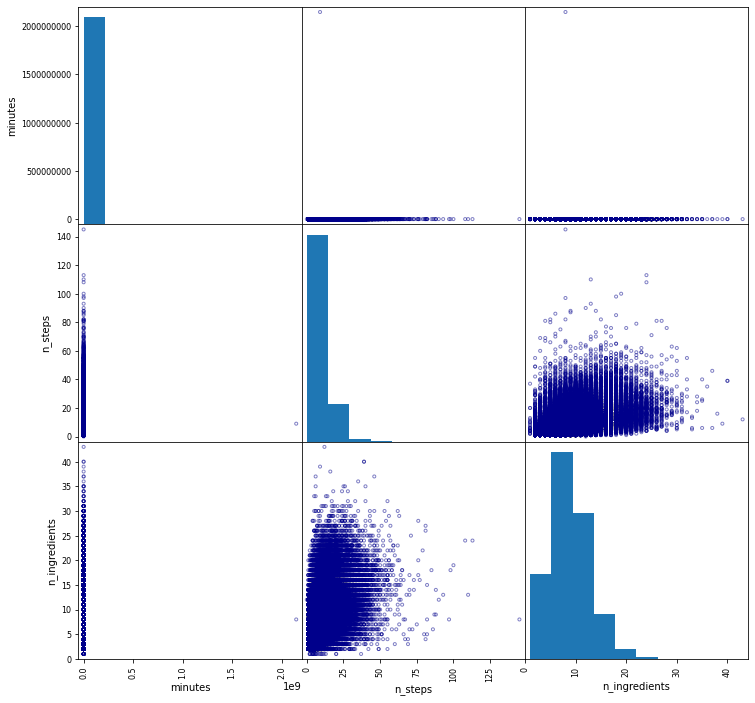

In [ ]:
pd.plotting.scatter_matrix(rec[['minutes', 'n_steps', 'n_ingredients']], figsize=(12,12),
c='none', edgecolor='darkblue');

In [ ]:
rec[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = rec.nutrition.str.split(",",expand=True) 
rec['calories'] = rec['calories'].apply(lambda x: x.replace("[" ,""))
rec['carbohydrates'] = rec['carbohydrates'].apply(lambda x: x.replace("]" ,""))
rec[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] =  rec[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype(float)

In [ ]:
nutrients = rec[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']]

In [ ]:
nutrients

calories  total fat  sugar  sodium  protein  saturated fat  \
0           51.5        0.0   13.0     0.0      2.0            0.0   
1          173.4       18.0    0.0    17.0     22.0           35.0   
2          269.8       22.0   32.0    48.0     39.0           27.0   
3          368.1       17.0   10.0     2.0     14.0            8.0   
4          352.9        1.0  337.0    23.0      3.0            0.0   
...          ...        ...    ...     ...      ...            ...   
231632     415.2       26.0   34.0    26.0     44.0           21.0   
231633      14.8        0.0    2.0    58.0      1.0            0.0   
231634      59.2        6.0    2.0     3.0      6.0            5.0   
231635     188.0       11.0   57.0    11.0      7.0           21.0   
231636     174.9       14.0   33.0     4.0      4.0           11.0   

        carbohydrates  
0                 4.0  
1                 1.0  
2                 5.0  
3                20.0  
4                28.0  
...               ...  
231632           15.0  
231633            1.0  
231634            0.0  
231635            9.0  
231636            6.0  

[231637 rows x 7 columns]

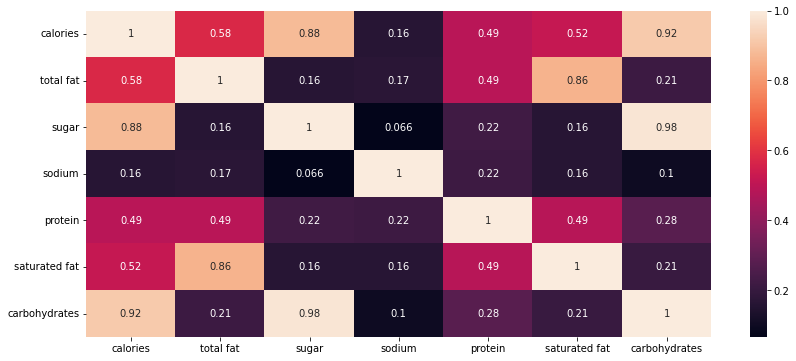

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(rec[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].corr(),annot=True)

<ipython-input-27-108dac4656ff>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  nutrients = nutrients.drop((nutrients[nutrients["sugar"]>=upper].index | nutrients[nutrients["sugar"]<=lower].index),axis=0)


In [ ]:
q1 = np.percentile(nutrients["carbohydrates"],25)
q3 = np.percentile(nutrients["carbohydrates"],75)
IQR = q3- q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

nutrients = nutrients.drop((nutrients[nutrients["carbohydrates"]>=upper].index | nutrients[nutrients["carbohydrates"]<=lower].index),axis=0)

<ipython-input-28-91d409dde431>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  nutrients = nutrients.drop((nutrients[nutrients["carbohydrates"]>=upper].index | nutrients[nutrients["carbohydrates"]<=lower].index),axis=0)


In [ ]:
nutrients = nutrients.drop(nutrients[nutrients["carbohydrates"]>=1000].index,axis=0)
nutrients = nutrients.drop(nutrients[nutrients["sugar"]>=10000].index,axis=0)

Text(0, 0.5, 'carboidrati')

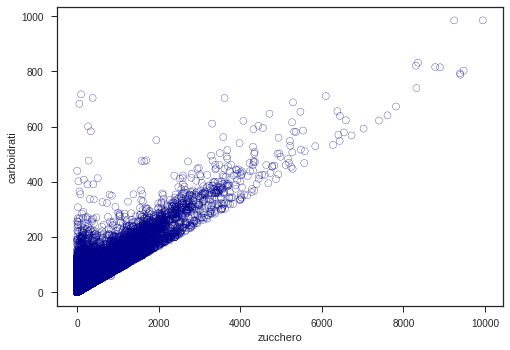

In [ ]:
plt.scatter(x=nutrients.sugar, y=nutrients.carbohydrates, c='none', edgecolor='darkblue')
plt.xlabel('zucchero')
plt.ylabel('carboidrati')

In [ ]:
nutrients = nutrients.drop(nutrients[nutrients["calories"]>=30000].index,axis=0)


Text(0, 0.5, 'calorie')

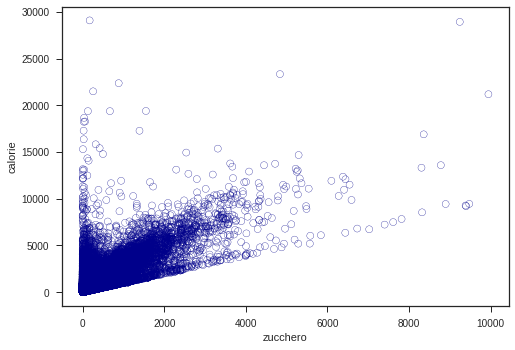

In [ ]:
plt.scatter(x=nutrients.sugar, y=nutrients.calories, c='none', edgecolor='darkblue')
plt.xlabel('zucchero')
plt.ylabel('calorie')

Text(0, 0.5, 'Steps Number')

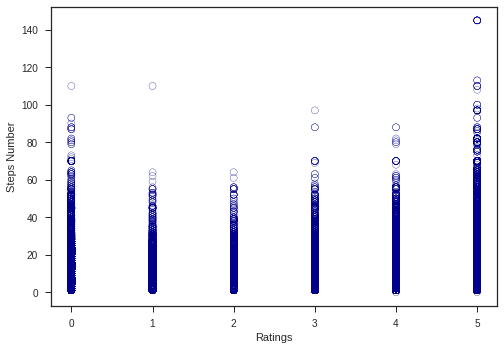

In [ ]:
plt.scatter(x=df.rating, y=df.n_steps, c='none', edgecolor='darkblue')
plt.xlabel('Ratings')
plt.ylabel('Steps Number')

In [ ]:
p = intr.rating.plot.box(vert=False, sym='k.')
plt.title('Weekly sales of P2, All stores')
plt.xlabel('Weekly sales')
p.set_facecolor('w')

In [ ]:
g = sns.PairGrid(rec[['n_steps','minutes', 'n_ingredients']], size=2.5
#,hue='n_steps', palette='Set2'
)
_ = g.map_offdiag(plt.scatter, s=20, alpha=0.5)
_ = g.map_diag(plt.hist, bins=20)
_ = g.add_legend()

Raggruppiamo per le valutazioni delle ricette e ricaviamo il rating medio e quante volte sono state selezionate

##Trasformazioni varie

In [ ]:
prova = intr.groupby(['recipe_id'])['rating'].agg(['mean','count'])
prova.reset_index(inplace=True)
prova

In [ ]:
prova.rename(columns={'mean':'average_rating','count':'votes'},inplace=True)

In [ ]:
prova

Cerchiamo di vedere i voti dati da una certa percentuale di ricette

In [ ]:
q = prova['votes'].quantile(0.9)
print(q)

q = prova['votes'].quantile(0.5)
print(q)

Preleviamo i dati da **nutrition** e inseriamoli nel dataframe res

In [ ]:
rec = pd.read_csv('/content/drive/MyDrive/Food.com/RAW_recipes.csv')

In [ ]:
rec[['calories', 'total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = rec.nutrition.str.split(",", expand=True)

In [ ]:
rec['calories'] = rec['calories'].apply(lambda x: x.replace('[','')) 

In [ ]:
rec['carbohydrates'] = rec['carbohydrates'].apply(lambda x: x.replace(']',''))

In [ ]:
rec.head()

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients calories  \
0  ['winter squash', 'mexican seasoning', 'mixed ...              7     51.5   
1  ['prepared pizza crust', 'sausage patty', 'egg...              6    173.4   
2  ['ground beef', 'yellow onions', 'diced tomato...             13    269.8   
3  ['spreadable cheese with garlic and herbs', 'n...             11    368.1   
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8    352.9   

  total fat   sugar sodium protein saturated fat carbohydrates  
0       0.0    13.0    0.0     2.0           0.0           4.0  
1      18.0     0.0   17.0    22.0          35.0           1.0  
2      22.0    32.0   48.0    39.0          27.0           5.0  
3      17.0    10.0    2.0    14.0           8.0          20.0  
4       1.0   337.0   23.0     3.0           0.0          28.0

In [ ]:
rec[['calories', 'total fat','sugar','sodium','protein','saturated fat','carbohydrates']].corr()

Empty DataFrame
Columns: []
Index: []

In [ ]:
nutr = rec[['calories', 'total fat','sugar','sodium','protein','saturated fat','carbohydrates']]

In [ ]:
nutr

calories total fat   sugar sodium protein saturated fat carbohydrates
0          51.5       0.0    13.0    0.0     2.0           0.0           4.0
1         173.4      18.0     0.0   17.0    22.0          35.0           1.0
2         269.8      22.0    32.0   48.0    39.0          27.0           5.0
3         368.1      17.0    10.0    2.0    14.0           8.0          20.0
4         352.9       1.0   337.0   23.0     3.0           0.0          28.0
...         ...       ...     ...    ...     ...           ...           ...
231632    415.2      26.0    34.0   26.0    44.0          21.0          15.0
231633     14.8       0.0     2.0   58.0     1.0           0.0           1.0
231634     59.2       6.0     2.0    3.0     6.0           5.0           0.0
231635    188.0      11.0    57.0   11.0     7.0          21.0           9.0
231636    174.9      14.0    33.0    4.0     4.0          11.0           6.0

[231637 rows x 7 columns]

In [ ]:
rec.corr()

id   minutes  contributor_id   n_steps  n_ingredients
id              1.000000  0.000582        0.114323  0.064512       0.039227
minutes         0.000582  1.000000       -0.000105 -0.000257      -0.000592
contributor_id  0.114323 -0.000105        1.000000  0.038569       0.019602
n_steps         0.064512 -0.000257        0.038569  1.000000       0.427705
n_ingredients   0.039227 -0.000592        0.019602  0.427705       1.000000

In [ ]:
rec.corr()

id   minutes  contributor_id   n_steps  n_ingredients
id              1.000000  0.000582        0.114323  0.064512       0.039227
minutes         0.000582  1.000000       -0.000105 -0.000257      -0.000592
contributor_id  0.114323 -0.000105        1.000000  0.038569       0.019602
n_steps         0.064512 -0.000257        0.038569  1.000000       0.427705
n_ingredients   0.039227 -0.000592        0.019602  0.427705       1.000000

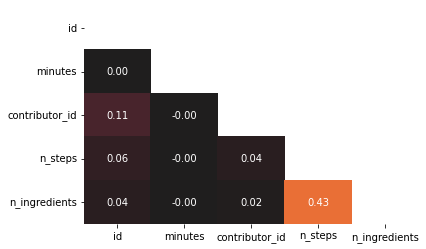

In [ ]:
sns.heatmap(rec.corr(),
vmin=-0.3,
vmax=0.6,
center=0,
annot=True,
fmt='.2f',
mask=~np.tri(rec.corr().shape[1], k=-1, dtype=bool),
cbar=False);

Text(0, 0.5, 'Steps Number')

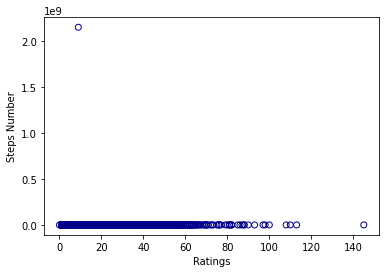

In [ ]:
plt.scatter(x=rec.n_steps, y=rec.minutes, c='none', edgecolor='darkblue')
plt.xlabel('Ratings')
plt.ylabel('Steps Number')

NameError: ignored

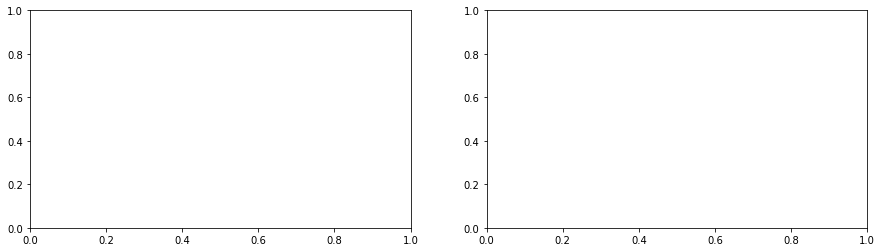

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(data=df, x=df.n_steps,y=df.minutes ,hue=df.rating,ax=ax[0])
sns.scatterplot(data=df,x=df.n_ingredients,y=df.minutes ,hue=df.rating,ax=ax[1])

NameError: ignored

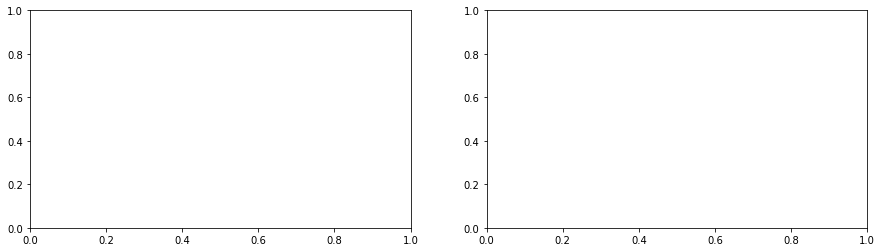

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(data=df,x=df['total fat'],y=df.calories ,hue=df.rating,ax=ax[0])
sns.scatterplot(data=rec,x=df.carbohydrates,y=df.sugar ,hue=df.rating,ax=ax[1])

In [ ]:
def prova(id):
  return id + 1

In [ ]:
rec['id'].apply(prova)

0         137740
1          31491
2         112141
3          59390
4          44062
           ...  
231632    486162
231633    493373
231634    308081
231635    298513
231636    298510
Name: id, Length: 231637, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


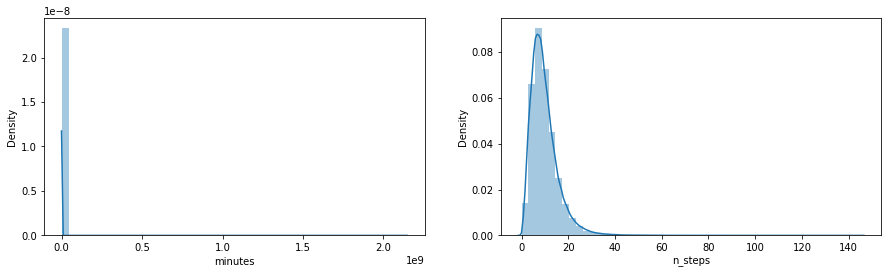

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.distplot(rec["minutes"],ax=ax[0])
sns.distplot(rec["n_steps"],ax=ax[1])

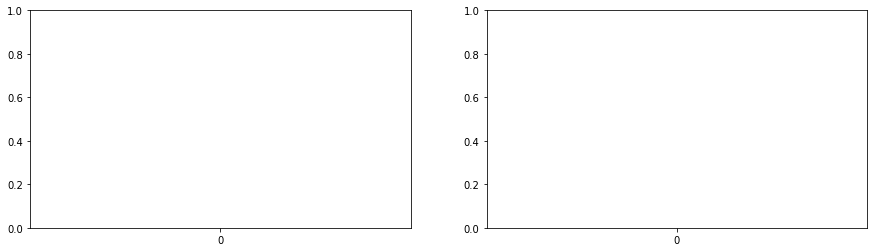

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(rec=rec["minutes"],ax=ax[0])
sns.boxplot(rec=rec["n_steps"],ax=ax[1])

We have to clear the two datasets from useless information

In [ ]:
rec.drop(['name', 'submitted', 'tags', 'nutrition', 'steps', 'description'], axis=1, inplace=True)

In [ ]:
rec[['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']].astype('float')

nsteps count
media steps

In [ ]:
import string

def convert_to_list(data):
    a = data.replace("-","").replace("[","").replace("]","")
#     a = ''.join([i for i in a if not i.isdigit()])
    a = a.translate(str.maketrans('', '', string.punctuation))
    return a

In [ ]:
rec["tags"] = rec["tags"].apply(lambda x: convert_to_list(x))

In [ ]:
rec

In [ ]:
df.isnull().sum()

NameError: ignored

Come possiamo vedere, non abbiamo alcun **missing value**

#Recommendation

Lo SPLITTING dei dati occorre eseguirlo mediante la tecnica **cross-fold validation**

In [2]:
!pip install pyorient

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyorient: filename=pyorient-1.5.5-py3-none-any.whl size=79023 sha256=b40001978f59e2be93383750ccc5f0a7f0a577ebeb1f1433f1b3034453cf123b
  Stored in directory: /root/.cache/pip/wheels/2f/80/12/6bf1db23e42042360603b0b29d54e9966dba6913c362646ed3
Successfully built pyorient


In [3]:
import pyorient

In [1]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095405 sha256=38fdcce68d61c4251f82d3b1d49a5799b95e6c62c42f85386d18f533add13366
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd
import surprise

from google.colab import drive

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as sk_train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

from surprise import accuracy, Dataset, KNNBasic, Reader
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

Identificazione della configurazione ottimale dell’algoritmo K-NN per la predizione dei rating. In
questo punto dovranno quindi essere testate le diverse combinazioni: distanza, valore di K,
user/item based. Tramite le diverse metriche di performance (MSE e RMSE) individuare di
conseguenza la configurazione ottimale. 

In [ ]:
intr['rating'] = intr['rating'] + 1

In [ ]:
intr.drop(['date', 'review'], axis=1, inplace=True)

Occorre selezionare gli users e gli items con maggior rating 

In [ ]:
intr

user_id  recipe_id  rating
0             38094      40893       5
1           1293707      40893       6
2              8937      44394       5
3            126440      85009       6
4             57222      85009       6
...             ...        ...     ...
1132362      116593      72730       1
1132363      583662     386618       6
1132364      157126      78003       6
1132365       53932      78003       5
1132366  2001868099      78003       6

[1132367 rows x 3 columns]

In [ ]:
#Eseguo queste operazioni in un ciclo in modo tale da applicare correttamente le riduzioni
for i in range(3):
  #Elimino gli utenti che hanno eseguito al più 20 interazioni
  counts = intr['recipe_id'].value_counts()
  intr = intr[intr['recipe_id'].isin(counts[counts > 20].index)]

  #Elimino le ricette a cui sono state eseguite al più 30 interazioni
  counts = intr['user_id'].value_counts()
  intr = intr[intr['user_id'].isin(counts[counts > 30].index)]

In [ ]:
intr.groupby(['user_id'])['recipe_id'].count().sort_values(ascending=False)

user_id
140132    953
176615    363
126440    359
173579    344
158086    311
         ... 
589777     31
169712     31
134289     31
439066     31
125808     31
Name: recipe_id, Length: 988, dtype: int64

In [ ]:
intr.groupby(['recipe_id'])['user_id'].count().sort_values(ascending=False)

recipe_id
27208     273
22782     220
89204     217
39087     216
28148     207
         ... 
69191      17
246875     17
26901      16
227257     16
246229     13
Name: user_id, Length: 1696, dtype: int64

In [ ]:
intr

user_id  recipe_id  rating
911        56680     152116       6
913        25792     152116       6
914        64154     152116       6
915       124249     152116       6
916       171303     152116       6
...          ...        ...     ...
1131655   242484      31311       6
1131659   470351      31311       6
1131662   499050      31311       5
1131665   416985      31311       6
1131668   407007      31311       6

[62171 rows x 3 columns]

In [ ]:
df = intr.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.5))

In [ ]:
df

user_id  recipe_id  rating
660855    45999      28943       1
476735   358796     179877       1
931806   359220      34011       1
866483    27643      32204       1
420078   187281      97340       1
...         ...        ...     ...
113217   128950      28768       6
619348   140132      33170       6
272140   168921     150863       6
436323   229524     101751       6
66415     45999      18816       6

[31085 rows x 3 columns]

#Content-Based

In [ ]:
def cos_dist(a, b):
  """
  Compute the cosine distance between two vectors.

  :param a: ndarray (n_features, )
  :param b: ndarray (n_features, )
  """
  return 1-np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [ ]:
rec.drop(columns = ['ingredients', 'submitted', 'name', 'steps', 'description', 'contributor_id'], axis=1, inplace=True)

###Prova con nutrition

In [ ]:
rec[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = rec.nutrition.str.split(",",expand=True) 

In [ ]:
rec['calories'] =  rec['calories'].apply(lambda x: x.replace('[','')) 

In [ ]:
rec['carbohydrates'] =  rec['carbohydrates'].apply(lambda x: x.replace(']','')) 

In [ ]:
rec[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = rec[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype('float')

In [ ]:
rec

id  minutes                                               tags  \
0       137739       55  ['60-minutes-or-less', 'time-to-make', 'course...   
1        31490       30  ['30-minutes-or-less', 'time-to-make', 'course...   
2       112140      130  ['time-to-make', 'course', 'preparation', 'mai...   
3        59389       45  ['60-minutes-or-less', 'time-to-make', 'course...   
4        44061      190  ['weeknight', 'time-to-make', 'course', 'main-...   
...        ...      ...                                                ...   
231632  486161       60  ['ham', '60-minutes-or-less', 'time-to-make', ...   
231633  493372        5  ['15-minutes-or-less', 'time-to-make', 'course...   
231634  308080       40  ['60-minutes-or-less', 'time-to-make', 'course...   
231635  298512       29  ['30-minutes-or-less', 'time-to-make', 'course...   
231636  298509       20  ['30-minutes-or-less', 'time-to-make', 'course...   

        n_steps  n_ingredients  calories  total fat  sugar  sodium  protein  \
0            11              7      51.5        0.0   13.0     0.0      2.0   
1             9              6     173.4       18.0    0.0    17.0     22.0   
2             6             13     269.8       22.0   32.0    48.0     39.0   
3            11             11     368.1       17.0   10.0     2.0     14.0   
4             5              8     352.9        1.0  337.0    23.0      3.0   
...         ...            ...       ...        ...    ...     ...      ...   
231632        7             22     415.2       26.0   34.0    26.0     44.0   
231633        1             13      14.8        0.0    2.0    58.0      1.0   
231634        7              8      59.2        6.0    2.0     3.0      6.0   
231635        9             10     188.0       11.0   57.0    11.0      7.0   
231636        5              7     174.9       14.0   33.0     4.0      4.0   

        saturated fat  carbohydrates  
0                 0.0            4.0  
1                35.0            1.0  
2                27.0            5.0  
3                 8.0           20.0  
4                 0.0           28.0  
...               ...            ...  
231632           21.0           15.0  
231633            0.0            1.0  
231634            5.0            0.0  
231635           21.0            9.0  
231636           11.0            6.0  

[231637 rows x 12 columns]

In [ ]:
rec.drop(columns = ['nutrition'], axis=1, inplace=True)

In [ ]:
nutrition = rec[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']]

In [ ]:
nutrition

calories  total fat  sugar  sodium  protein  saturated fat  \
0           51.5        0.0   13.0     0.0      2.0            0.0   
1          173.4       18.0    0.0    17.0     22.0           35.0   
2          269.8       22.0   32.0    48.0     39.0           27.0   
3          368.1       17.0   10.0     2.0     14.0            8.0   
4          352.9        1.0  337.0    23.0      3.0            0.0   
...          ...        ...    ...     ...      ...            ...   
230181     415.2       26.0   34.0    26.0     44.0           21.0   
230182      14.8        0.0    2.0    58.0      1.0            0.0   
230183      59.2        6.0    2.0     3.0      6.0            5.0   
230184     188.0       11.0   57.0    11.0      7.0           21.0   
230185     174.9       14.0   33.0     4.0      4.0           11.0   

        carbohydrates  
0                 4.0  
1                 1.0  
2                 5.0  
3                20.0  
4                28.0  
...               ...  
230181           15.0  
230182            1.0  
230183            0.0  
230184            9.0  
230185            6.0  

[230186 rows x 7 columns]

In [ ]:
d = {'value': ['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']}
values = pd.DataFrame(d)

In [ ]:
values

value
0       calories
1      total fat
2          sugar
3         sodium
4        protein
5  saturated fat
6  carbohydrates

In [ ]:
# Cosine distance between two movies
recipe1 = 137739
recipe2 = 112140
recipe3 = 298512
feature1 = rec[rec['id'] == recipe1][values['value'].tolist()].to_numpy().flatten()
feature2 = rec[rec['id'] == recipe2][values['value'].tolist()].to_numpy().flatten()
feature3 = rec[rec['id'] == recipe3][values['value'].tolist()].to_numpy().flatten()

In [ ]:
print(f'Cosine distance ({recipe1}, {recipe2}) = {cos_dist(feature1, feature2):.2f}')
print(f'Cosine distance ({recipe1}, {recipe3}) = {cos_dist(feature1, feature3):.2f}')
print(f'Cosine distance ({recipe2}, {recipe3}) = {cos_dist(feature2, feature3):.2f}')

Cosine distance (137739, 112140) = 0.04
Cosine distance (137739, 298512) = 0.01
Cosine distance (112140, 298512) = 0.03


###Prova con tags

####Trasformazioni

In [ ]:
from ast import literal_eval
# convert the tags column to list format
rec['tags'] = rec['tags'].apply(lambda x: literal_eval(str(x)))

In [ ]:
rec

id  minutes                                               tags  \
0       137739       55  [60-minutes-or-less, time-to-make, course, mai...   
1        31490       30  [30-minutes-or-less, time-to-make, course, mai...   
2       112140      130  [time-to-make, course, preparation, main-dish,...   
3        59389       45  [60-minutes-or-less, time-to-make, course, mai...   
4        44061      190  [weeknight, time-to-make, course, main-ingredi...   
...        ...      ...                                                ...   
231632  486161       60  [ham, 60-minutes-or-less, time-to-make, course...   
231633  493372        5  [15-minutes-or-less, time-to-make, course, pre...   
231634  308080       40  [60-minutes-or-less, time-to-make, course, mai...   
231635  298512       29  [30-minutes-or-less, time-to-make, course, pre...   
231636  298509       20  [30-minutes-or-less, time-to-make, course, pre...   

                                          nutrition  n_steps  n_ingredients  
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11              7  
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9              6  
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6             13  
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11             11  
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5              8  
...                                             ...      ...            ...  
231632  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7             22  
231633        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1             13  
231634         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7              8  
231635    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9             10  
231636     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5              7  

[231637 rows x 6 columns]

In [ ]:
rec['tags'].tolist()

[['60-minutes-or-less',
  'time-to-make',
  'course',
  'main-ingredient',
  'cuisine',
  'preparation',
  'occasion',
  'north-american',
  'side-dishes',
  'vegetables',
  'mexican',
  'easy',
  'fall',
  'holiday-event',
  'vegetarian',
  'winter',
  'dietary',
  'christmas',
  'seasonal',
  'squash'],
 ['30-minutes-or-less',
  'time-to-make',
  'course',
  'main-ingredient',
  'cuisine',
  'preparation',
  'occasion',
  'north-american',
  'breakfast',
  'main-dish',
  'pork',
  'american',
  'oven',
  'easy',
  'kid-friendly',
  'pizza',
  'dietary',
  'northeastern-united-states',
  'meat',
  'equipment'],
 ['time-to-make',
  'course',
  'preparation',
  'main-dish',
  'chili',
  'crock-pot-slow-cooker',
  'dietary',
  'equipment',
  '4-hours-or-less'],
 ['60-minutes-or-less',
  'time-to-make',
  'course',
  'main-ingredient',
  'preparation',
  'occasion',
  'side-dishes',
  'eggs-dairy',
  'potatoes',
  'vegetables',
  'oven',
  'easy',
  'dinner-party',
  'holiday-event',
  'e

In [ ]:
rec['time-to-make'] = ['time-to-make' in tag for tag in rec['tags']]
rec['american'] = ['american' in tag for tag in rec['tags']]
rec['dietary'] = ['dietary' in tag for tag in rec['tags']]
rec['european'] = ['european' in tag for tag in rec['tags']]
rec['15-minutes-or-less'] = ['15-minutes-or-less' in tag for tag in rec['tags']]
rec['30-minutes-or-less'] = ['30-minutes-or-less' in tag for tag in rec['tags']]
rec['60-minutes-or-less'] = ['60-minutes-or-less' in tag for tag in rec['tags']]
rec['3-steps-or-less'] = ['3-steps-or-less' in tag for tag in rec['tags']]
rec['meat'] = ['meat' in tag for tag in rec['tags']]
rec['vegetarian'] = ['vegetarian' in tag for tag in rec['tags']]
rec['vegan'] = ['vegan' in tag for tag in rec['tags']]
rec['indian'] = ['indian' in tag for tag in rec['tags']]
rec['asian'] = ['asian' in tag for tag in rec['tags']]
rec['mexican'] = ['mexican' in tag for tag in rec['tags']]
rec['gluten-free'] = ['gluten-free' in tag for tag in rec['tags']]
rec['main-ingredient'] = ['main-ingredient' in tag for tag in rec['tags']]
rec['desserts'] = ['desserts' in tag for tag in rec['tags']]
rec['low-protein'] = ['low-protein' in tag for tag in rec['tags']]
rec['low-sodium'] = ['low-sodium' in tag for tag in rec['tags']]
rec['low-cholesterol'] = ['low-cholesterol' in tag for tag in rec['tags']]
rec['low-saturated-fat'] = ['low-saturated-fat' in tag for tag in rec['tags']]
rec['low-carb'] = ['low-carb' in tag for tag in rec['tags']]
rec['low-calorie'] = ['low-calorie' in tag for tag in rec['tags']]
rec['low-in-something'] = ['low-in-something' in tag for tag in rec['tags']]

In [ ]:
rec[['time-to-make', 'american','dietary','european','15-minutes-or-less','30-minutes-or-less','60-minutes-or-less', '3-steps-or-less', 'meat', 'vegetarian', 'vegan', 'indian', 'asian', 'mexican', 'gluten-free', 'main-ingredient', 'desserts', 'low-protein','low-sodium', 'low-cholesterol', 'low-saturated-fat', 'low-carb', 'low-calorie', 'low-in-something']] = rec[['time-to-make', 'american','dietary','european','15-minutes-or-less','30-minutes-or-less','60-minutes-or-less', '3-steps-or-less','meat', 'vegetarian', 'vegan', 'indian', 'asian', 'mexican', 'gluten-free', 'main-ingredient', 'desserts', 'low-protein', 'low-sodium', 'low-cholesterol', 'low-saturated-fat', 'low-carb','low-calorie', 'low-in-something']].astype(int)

In [ ]:
d = {'value': ['time-to-make', 'american','dietary','european','15-minutes-or-less','30-minutes-or-less','60-minutes-or-less', '3-steps-or-less', 'meat', 'vegetarian', 'vegan', 'indian', 'asian', 'mexican', 'gluten-free', 'main-ingredient', 'desserts', 'low-protein','low-sodium', 'low-cholesterol', 'low-saturated-fat', 'low-carb', 'low-calorie', 'low-in-something']}
categories = pd.DataFrame(d)

In [ ]:
categories

value
0         time-to-make
1             american
2              dietary
3             european
4   15-minutes-or-less
5   30-minutes-or-less
6   60-minutes-or-less
7      3-steps-or-less
8                 meat
9           vegetarian
10               vegan
11              indian
12               asian
13             mexican
14         gluten-free
15     main-ingredient
16            desserts
17         low-protein
18          low-sodium
19     low-cholesterol
20   low-saturated-fat
21            low-carb
22         low-calorie
23    low-in-something

In [ ]:
# Cosine distance between two movies
recipe1 = 137739
recipe2 = 137739
recipe3 = 298512
feature1 = rec[rec['id'] == recipe1][categories['value'].tolist()].to_numpy().flatten()
feature2 = rec[rec['id'] == recipe2][categories['value'].tolist()].to_numpy().flatten()
feature3 = rec[rec['id'] == recipe3][categories['value'].tolist()].to_numpy().flatten()

In [ ]:
print(f'Cosine distance ({recipe1}, {recipe2}) = {cos_dist(feature1, feature2):.2f}')
print(f'Cosine distance ({recipe1}, {recipe3}) = {cos_dist(feature1, feature3):.2f}')
print(f'Cosine distance ({recipe2}, {recipe3}) = {cos_dist(feature2, feature3):.2f}')

Cosine distance (137739, 137739) = -0.00
Cosine distance (137739, 298512) = 0.59
Cosine distance (137739, 298512) = 0.59


In [ ]:
rec[rec['id'] == recipe1][categories['value'].tolist()].to_numpy().flatten()

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
rec[rec['id'] == recipe2][categories['value'].tolist()].to_numpy().flatten()

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

####Usiamo il kNN

Nearest Neighbors
How to use K-NN to predict ratings
*   **Step 1:** Find similarity scores between the movie and all the movies user has rated
*   **Step 2:** Sort and choose top 40 nearest neighbors of the movie
*   **Step 3:** Take the weighted average and predict the ratings

In [ ]:
intr

user_id  recipe_id        date  rating  \
0             38094      40893  2003-02-17       4   
1           1293707      40893  2011-12-21       5   
2              8937      44394  2002-12-01       4   
3            126440      85009  2010-02-27       5   
4             57222      85009  2011-10-01       5   
...             ...        ...         ...     ...   
1132362      116593      72730  2003-12-09       0   
1132363      583662     386618  2009-09-29       5   
1132364      157126      78003  2008-06-23       5   
1132365       53932      78003  2009-01-11       4   
1132366  2001868099      78003  2017-12-18       5   

                                                    review  
0        Great with a salad. Cooked on top of stove for...  
1        So simple, so delicious! Great for chilly fall...  
2        This worked very well and is EASY.  I used not...  
3        I made the Mexican topping and took it to bunk...  
4        Made the cheddar bacon topping, adding a sprin...  
...                                                    ...  
1132362  Another approach is to start making sauce with...  
1132363  These were so delicious!  My husband and I tru...  
1132364  WOW!  Sometimes I don't take the time to rate ...  
1132365  Very good!  I used regular port as well.  The ...  
1132366  I am so glad I googled and found this here. Th...  

[1132367 rows x 5 columns]

In [ ]:
categories['value']

0           time-to-make
1               american
2                dietary
3               european
4     15-minutes-or-less
5     30-minutes-or-less
6     60-minutes-or-less
7        3-steps-or-less
8                   meat
9             vegetarian
10                 vegan
11                indian
12                 asian
13               mexican
14           gluten-free
15       main-ingredient
16              desserts
17           low-protein
18            low-sodium
19       low-cholesterol
20     low-saturated-fat
21              low-carb
22           low-calorie
23      low-in-something
Name: value, dtype: object

In [ ]:
matrix = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
matrix

recipe_id   519     536     607     749     822     1005    1356    1985    \
user_id                                                                      
1535             0       0       0       0       0       0       0       0   
3288             0       0       0       0       0       0       0       0   
4291             0       0       0       0       0       0       0       0   
4439             0       6       0       0       0       0       0       0   
4470             1       0       0       0       0       0       6       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          0       0       0       0       0       0       0       0   
2549237          0       0       0       0       0       0       0       0   
1800054678       0       0       0       0       0       0       6       0   
1802849661       0       0       0       0       0       0       0       0   
2000431901       0       0       0       0       0       0       0       0   

recipe_id   2072    2496    ...  367414  373346  376786  384800  385071  \
user_id                     ...                                           
1535             0       0  ...       0       0       0       0       0   
3288             0       0  ...       0       0       0       0       0   
4291             0       0  ...       0       0       0       0       0   
4439             0       0  ...       0       0       0       0       0   
4470             0       0  ...       0       0       0       0       0   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2324285          0       0  ...       0       0       0       0       0   
2549237          0       0  ...       0       0       0       0       0   
1800054678       0       0  ...       0       0       0       0       0   
1802849661       0       6  ...       0       0       0       0       0   
2000431901       0       0  ...       0       0       0       0       0   

recipe_id   388397  400137  428004  428116  429576  
user_id                                             
1535             0       0       0       0       0  
3288             0       0       0       0       0  
4291             0       0       0       0       0  
4439             0       0       0       0       0  
4470             0       0       0       6       0  
...            ...     ...     ...     ...     ...  
2324285          0       0       0       0       0  
2549237          0       0       0       5       0  
1800054678       0       0       0       0       0  
1802849661       0       0       0       0       0  
2000431901       0       0       0       0       0  

[988 rows x 1696 columns]

In [ ]:
for user in matrix.index:
  for recipe in matrix.columns:
    if matrix.loc[user][recipe] == 0:
      rated_items = intr[intr['user_id'] == user]['recipe_id'].tolist()
      rated_items = np.array(rated_items)
      neigh = NearestNeighbors(n_neighbors=len(rated_items), metric=cos_dist)
      neigh.fit(rec[rec['id'].isin(rated_items)][categories['value'].tolist()])
      distances, top_items = neigh.kneighbors(rec[rec['id'] == int(recipe)][categories['value'].tolist()])
      pred_rating = intr[(intr['user_id'] == user) & (intr['recipe_id'].isin(rated_items[top_items.flatten()]))]['rating'].mean()
      matrix.loc[user][recipe] = pred_rating

In [ ]:
#matrix.to_csv('/content/drive/MyDrive/Food.com/rating_matrixCB.csv')

In [ ]:
matrix = pd.read_csv('/content/drive/MyDrive/Food.com/rating_matrixCB.csv')

In [ ]:
matrix = matrix.set_index("user_id")

In [ ]:
matrix

519  536  607  749  822  1005  1356  1985  2072  2496  ...  \
user_id                                                            ...   
1535          5    5    5    5    5     5     5     5     5     5  ...   
3288          5    5    5    5    5     5     5     5     5     5  ...   
4291          5    5    5    5    5     5     5     5     5     5  ...   
4439          5    6    5    5    5     5     5     5     5     5  ...   
4470          1    5    5    5    5     5     6     5     5     5  ...   
...         ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...   
2324285       5    5    5    5    5     5     5     5     5     5  ...   
2549237       5    5    5    5    5     5     5     5     5     5  ...   
1800054678    5    5    5    5    5     5     6     5     5     5  ...   
1802849661    5    5    5    5    5     5     5     5     5     6  ...   
2000431901    5    5    5    5    5     5     5     5     5     5  ...   

            367414  373346  376786  384800  385071  388397  400137  428004  \
user_id                                                                      
1535             5       5       5       5       5       5       5       5   
3288             5       5       5       5       5       5       5       5   
4291             5       5       5       5       5       5       5       5   
4439             5       5       5       5       5       5       5       5   
4470             5       5       5       5       5       5       5       5   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          5       5       5       5       5       5       5       5   
2549237          5       5       5       5       5       5       5       5   
1800054678       5       5       5       5       5       5       5       5   
1802849661       5       5       5       5       5       5       5       5   
2000431901       5       5       5       5       5       5       5       5   

            428116  429576  
user_id                     
1535             5       5  
3288             5       5  
4291             5       5  
4439             5       5  
4470             6       5  
...            ...     ...  
2324285          5       5  
2549237          5       5  
1800054678       5       5  
1802849661       5       5  
2000431901       5       5  

[988 rows x 1696 columns]

Calcoliamo le metriche MSE e RMSE

In [ ]:
mr = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=0)
mr

recipe_id   519     536     607     749     822     1005    1356    1985    \
user_id                                                                      
1535             0       0       0       0       0       0       0       0   
3288             0       0       0       0       0       0       0       0   
4291             0       0       0       0       0       0       0       0   
4439             0       6       0       0       0       0       0       0   
4470             1       0       0       0       0       0       6       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          0       0       0       0       0       0       0       0   
2549237          0       0       0       0       0       0       0       0   
1800054678       0       0       0       0       0       0       6       0   
1802849661       0       0       0       0       0       0       0       0   
2000431901       0       0       0       0       0       0       0       0   

recipe_id   2072    2496    ...  367414  373346  376786  384800  385071  \
user_id                     ...                                           
1535             0       0  ...       0       0       0       0       0   
3288             0       0  ...       0       0       0       0       0   
4291             0       0  ...       0       0       0       0       0   
4439             0       0  ...       0       0       0       0       0   
4470             0       0  ...       0       0       0       0       0   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2324285          0       0  ...       0       0       0       0       0   
2549237          0       0  ...       0       0       0       0       0   
1800054678       0       0  ...       0       0       0       0       0   
1802849661       0       6  ...       0       0       0       0       0   
2000431901       0       0  ...       0       0       0       0       0   

recipe_id   388397  400137  428004  428116  429576  
user_id                                             
1535             0       0       0       0       0  
3288             0       0       0       0       0  
4291             0       0       0       0       0  
4439             0       0       0       0       0  
4470             0       0       0       6       0  
...            ...     ...     ...     ...     ...  
2324285          0       0       0       0       0  
2549237          0       0       0       5       0  
1800054678       0       0       0       0       0  
1802849661       0       0       0       0       0  
2000431901       0       0       0       0       0  

[988 rows x 1696 columns]

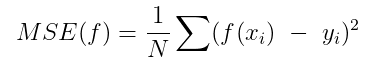

In [ ]:
sum = 0
n = 0
for user in mr.index:
  for recipe in mr.columns:
    if mr.loc[user][recipe] != 0:
      rated_items = intr[intr['user_id'] == user]['recipe_id'].tolist()
      rated_items.remove(recipe)
      rated_items = np.array(rated_items)
      neigh = NearestNeighbors(n_neighbors=len(rated_items), metric=cos_dist)
      neigh.fit(rec[rec['id'].isin(rated_items)][categories['value'].tolist()])
      distances, top_items = neigh.kneighbors(rec[rec['id'] == int(recipe)][categories['value'].tolist()])
      pred_rating = intr[(intr['user_id'] == user) & (intr['recipe_id'].isin(rated_items[top_items.flatten()]))]['rating'].mean()
      diff = (pred_rating - mr.loc[user][recipe])**2
      sum = sum + diff
      n = n + 1
value = sum/n

Output streaming troncato alle ultime 5000 righe.
<ipython-input-10-c6fea63761c1>:8: RuntimeWarning: invalid value encountered in double_scalars
  return 1-np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
<ipython-input-10-c6fea63761c1>:8: RuntimeWarning: invalid value encountered in double_scalars
  return 1-np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
<ipython-input-10-c6fea63761c1>:8: RuntimeWarning: invalid value encountered in double_scalars
  return 1-np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
<ipython-input-10-c6fea63761c1>:8: RuntimeWarning: invalid value encountered in double_scalars
  return 1-np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
<ipython-input-10-c6fea63761c1>:8: RuntimeWarning: invalid value encountered in double_scalars
  return 1-np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
<ipython-input-10-c6fea63761c1>:8: RuntimeWarning: invalid value encountered in double_scalars
  return 1-np.dot(a, b) / (np.linalg.norm(a) * np.

In [ ]:
value

0.6037245851230516

In [ ]:
np.sqrt(value)

0.776997159018649

## Nearest Neighbors Regression
Neighbors-based regression can be used in cases where the data labels are continuous. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

In [ ]:
rec = rec.rename(columns={"id": "recipe_id"})

In [ ]:
# Select the user
user_id = 58104
print(f'User: {user_id}')
# Get items that the user has rated
ratings = intr[intr['user_id'] == user_id]
rated_items = rec[rec['recipe_id'].isin(ratings['recipe_id'])]
print(f'# rated items: {len(rated_items)}')

User: 58104
# rated items: 81


In [ ]:
# Create the dataset with features and labels
dataset = pd.merge(rated_items, ratings, on="recipe_id")
dataset.head()

recipe_id  minutes                                               tags  \
0     152441       15  [15-minutes-or-less, time-to-make, course, mai...   
1      31482       90  [weeknight, time-to-make, course, main-ingredi...   
2     290136       50  [60-minutes-or-less, time-to-make, course, mai...   
3     137370        5  [15-minutes-or-less, time-to-make, course, mai...   
4     169790      114  [time-to-make, course, preparation, low-protei...   

                                      nutrition  n_steps  n_ingredients  \
0       [124.4, 9.0, 48.0, 5.0, 2.0, 18.0, 5.0]        3              4   
1  [768.5, 48.0, 181.0, 66.0, 63.0, 56.0, 31.0]        9              7   
2    [325.5, 20.0, 42.0, 6.0, 23.0, 24.0, 13.0]        4              7   
3        [111.1, 0.0, 58.0, 0.0, 2.0, 0.0, 9.0]        4              3   
4       [196.2, 3.0, 24.0, 1.0, 9.0, 6.0, 12.0]       21              9   

   time-to-make  american  dietary  european  ...  desserts  low-protein  \
0             1         0        1         0  ...         0            1   
1             1         0        1         0  ...         0            0   
2             1         0        1         0  ...         0            0   
3             1         0        1         0  ...         0            1   
4             1         0        1         0  ...         0            1   

   low-sodium  low-cholesterol  low-saturated-fat  low-carb  low-calorie  \
0           1                0                  0         0            1   
1           0                0                  0         0            0   
2           1                0                  0         0            0   
3           1                1                  1         1            1   
4           1                1                  1         0            1   

   low-in-something  user_id  rating  
0                 1    58104       6  
1                 0    58104       6  
2                 1    58104       6  
3                 1    58104       5  
4                 1    58104       6  

[5 rows x 32 columns]

In [ ]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = sk_train_test_split(dataset[categories['value'].tolist()], dataset['rating'], test_size=0.20, random_state=0)

In [ ]:
# Train the regressor using the trainset
neigh_reg = KNeighborsRegressor(n_neighbors=10, metric=cos_dist)
neigh_reg.fit(X_train, y_train)

KNeighborsRegressor(metric=<function cos_dist at 0x7efc0fc13430>,
                    n_neighbors=10)

In [ ]:
# Test the regressor using the testset
y_pred = neigh_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'MSE = {mse:.6f}')
print(f'RMSE = {rmse:.6f}')

MSE = 1.748235
RMSE = 1.322208


## K-MEANS

In [ ]:
intr

user_id  recipe_id  rating
911        56680     152116       6
913        25792     152116       6
914        64154     152116       6
915       124249     152116       6
916       171303     152116       6
...          ...        ...     ...
1131655   242484      31311       6
1131659   470351      31311       6
1131662   499050      31311       5
1131665   416985      31311       6
1131668   407007      31311       6

[62171 rows x 3 columns]

In [ ]:
from sklearn.cluster import KMeans

Per evitare qualsiasi sorta di distorsione dovuta al filling dei valori non ancora predetti con zero utilizzando la Distanza Euclidea, poniamo come valore la media dei rating

In [ ]:
intr['rating'].mean()

5.667449453925464

In [ ]:
intr.groupby(['user_id'])['rating'].mean()

user_id
1535          5.649485
3288          5.267857
4291          5.745098
4439          5.651515
4470          5.797101
                ...   
2324285       5.608696
2549237       5.142857
1800054678    5.849315
1802849661    5.700000
2000431901    5.048780
Name: rating, Length: 988, dtype: float64

In [ ]:
y = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=intr['rating'].mean())

In [ ]:
y

recipe_id     519       536       607       749       822       1005    \
user_id                                                                  
1535        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4439        5.667449  6.000000  5.667449  5.667449  5.667449  5.667449   
4470        1.000000  5.667449  5.667449  5.667449  5.667449  5.667449   
...              ...       ...       ...       ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1800054678  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   

recipe_id     1356      1985      2072      2496    ...    367414    373346  \
user_id                                             ...                       
1535        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4439        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4470        6.000000  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
...              ...       ...       ...       ...  ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
1800054678  6.000000  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  6.000000  ...  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   

recipe_id     376786    384800    385071    388397    400137    428004  \
user_id                                                                  
1535        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4439        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4470        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
...              ...       ...       ...       ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1800054678  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   

recipe_id     428116    429576  
user_id                         
1535        5.667449  5.667449  
3288        5.667449  5.667449  
4291        5.667449  5.667449  
4439        5.667449  5.667449  
4470        6.000000  5.667449  
...              ...       ...  
2324285     5.667449  5.667449  
2549237     5.000000  5.667449  
1800054678  5.667449  5.667449  
1802849661  5.667449  5.667449  
2000431901  5.667449  5.667449  

[988 rows x 1696 columns]

Elbow Method

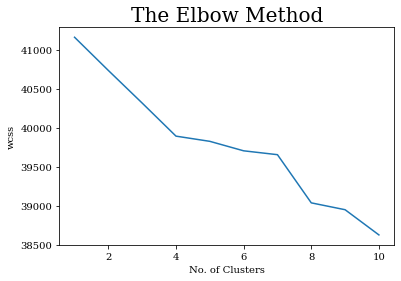

In [ ]:
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(y)
  wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(y)

In [ ]:
len(y_means)

988

In [ ]:
y['labels'] = y_means

In [ ]:
y

recipe_id        519       536       607       749       822      1005  \
user_id                                                                  
1535        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4439        5.667449  6.000000  5.667449  5.667449  5.667449  5.667449   
4470        1.000000  5.667449  5.667449  5.667449  5.667449  5.667449   
...              ...       ...       ...       ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1800054678  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   

recipe_id       1356      1985      2072      2496  ...    373346    376786  \
user_id                                             ...                       
1535        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4439        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4470        6.000000  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
...              ...       ...       ...       ...  ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
1800054678  6.000000  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  6.000000  ...  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   

recipe_id     384800    385071    388397    400137    428004    428116  \
user_id                                                                  
1535        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4439        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4470        5.667449  5.667449  5.667449  5.667449  5.667449  6.000000   
...              ...       ...       ...       ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  5.667449  5.000000   
1800054678  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   

recipe_id     429576  labels  
user_id                       
1535        5.667449       3  
3288        5.667449       7  
4291        5.667449       3  
4439        5.667449       7  
4470        5.667449       3  
...              ...     ...  
2324285     5.667449       3  
2549237     5.667449       7  
1800054678  5.667449       3  
1802849661  5.667449       3  
2000431901  5.667449       3  

[988 rows x 1697 columns]

In [ ]:
print("--------------------------------------------")
cluster1 = y[y["labels"]==0]
print('Number of users in 1st group (LABEL 0)=', len(cluster1))
print('They are -', cluster1.index)
print("--------------------------------------------")
cluster2 = y[y["labels"]==1]
print('Number of users in 2nd group (LABEL 1)=', len(cluster2))
print('They are -', cluster2.index)
print("--------------------------------------------")
cluster3 = y[y["labels"]==2]
print('Number of users in 3rd group (LABEL 2)=', len(cluster3))
print('They are -', cluster3.index)
print("--------------------------------------------")
cluster4 = y[y["labels"]==3]
print('Number of users in 4th group (LABEL 3)=', len(cluster4))
print('They are -', cluster4.index)
print("--------------------------------------------")
cluster5 = y[y["labels"]==4]
print('Number of users in 5th group (LABEL 4)=', len(cluster5))
print('They are -', cluster5.index)
print("--------------------------------------------")
cluster6 = y[y["labels"]==5]
print('Number of users in 6th group (LABEL 5)=', len(cluster6))
print('They are -', cluster6.index)
print("--------------------------------------------")
cluster7 = y[y["labels"]==6]
print('Number of users in 7th group (LABEL 6)=', len(cluster7))
print('They are -', cluster7.index)
print("--------------------------------------------")
cluster8 = y[y["labels"]==7]
print('Number of users in 8th group (LABEL 7)=', len(cluster8))
print('They are -', cluster8.index)
print("--------------------------------------------")

--------------------------------------------
Number of users in 1st group (LABEL 0)= 3
They are - Int64Index([135887, 348437, 424494], dtype='int64', name='user_id')
--------------------------------------------
Number of users in 2nd group (LABEL 1)= 1
They are - Int64Index([673444], dtype='int64', name='user_id')
--------------------------------------------
Number of users in 3rd group (LABEL 2)= 1
They are - Int64Index([218535], dtype='int64', name='user_id')
--------------------------------------------
Number of users in 4th group (LABEL 3)= 871
They are - Int64Index([      1535,       4291,       4470,       4740,       5060,
                  6258,       6357,       6651,       6836,       7108,
            ...
               1376400,    1506604,    1636470,    1701315,    2041603,
               2123645,    2324285, 1800054678, 1802849661, 2000431901],
           dtype='int64', name='user_id', length=871)
--------------------------------------------
Number of users in 5th group (

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(y, y['labels'])
print("-------------------EVALUATION METRICS-------------------------")
print('Silhouette score =', silhouette_score)


-------------------EVALUATION METRICS-------------------------
Silhouette score = 0.2849287674546252


####NLTK

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dataframe = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
dataframe

recipe_id   519     536     607     749     822     1005    1356    1985    \
user_id                                                                      
1535             0       0       0       0       0       0       0       0   
3288             0       0       0       0       0       0       0       0   
4291             0       0       0       0       0       0       0       0   
4439             0       6       0       0       0       0       0       0   
4470             1       0       0       0       0       0       6       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          0       0       0       0       0       0       0       0   
2549237          0       0       0       0       0       0       0       0   
1800054678       0       0       0       0       0       0       6       0   
1802849661       0       0       0       0       0       0       0       0   
2000431901       0       0       0       0       0       0       0       0   

recipe_id   2072    2496    ...  367414  373346  376786  384800  385071  \
user_id                     ...                                           
1535             0       0  ...       0       0       0       0       0   
3288             0       0  ...       0       0       0       0       0   
4291             0       0  ...       0       0       0       0       0   
4439             0       0  ...       0       0       0       0       0   
4470             0       0  ...       0       0       0       0       0   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2324285          0       0  ...       0       0       0       0       0   
2549237          0       0  ...       0       0       0       0       0   
1800054678       0       0  ...       0       0       0       0       0   
1802849661       0       6  ...       0       0       0       0       0   
2000431901       0       0  ...       0       0       0       0       0   

recipe_id   388397  400137  428004  428116  429576  
user_id                                             
1535             0       0       0       0       0  
3288             0       0       0       0       0  
4291             0       0       0       0       0  
4439             0       0       0       0       0  
4470             0       0       0       6       0  
...            ...     ...     ...     ...     ...  
2324285          0       0       0       0       0  
2549237          0       0       0       5       0  
1800054678       0       0       0       0       0  
1802849661       0       0       0       0       0  
2000431901       0       0       0       0       0  

[988 rows x 1696 columns]

In [ ]:
import nltk 
from nltk.cluster.util import VectorSpaceClusterer
from nltk import cluster
from nltk.cluster import euclidean_distance
from numpy import array
from nltk.cluster import KMeansClusterer, euclidean_distance

N_CLUSTER = 7
kclusterer = KMeansClusterer(N_CLUSTER, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(dataframe.to_numpy(), assign_clusters=True)
print(assigned_clusters)

[1, 5, 5, 0, 3, 0, 3, 3, 1, 0, 0, 0, 4, 3, 0, 5, 3, 5, 1, 5, 1, 3, 3, 2, 5, 0, 0, 3, 0, 6, 2, 5, 3, 0, 6, 3, 3, 4, 2, 4, 4, 5, 4, 5, 5, 5, 3, 3, 5, 1, 5, 2, 4, 0, 4, 4, 0, 6, 3, 0, 6, 3, 5, 1, 5, 1, 3, 3, 4, 0, 0, 5, 3, 0, 4, 0, 1, 5, 3, 0, 0, 0, 3, 5, 0, 0, 3, 1, 6, 6, 0, 5, 0, 0, 4, 3, 3, 0, 1, 2, 0, 5, 0, 3, 0, 5, 4, 4, 3, 1, 1, 3, 0, 3, 5, 2, 5, 3, 2, 3, 0, 6, 3, 1, 0, 5, 0, 0, 5, 5, 1, 3, 0, 2, 4, 2, 3, 3, 0, 3, 5, 0, 3, 3, 0, 6, 5, 5, 3, 1, 3, 6, 3, 5, 6, 1, 5, 3, 3, 1, 2, 4, 0, 3, 3, 6, 3, 0, 3, 0, 4, 1, 1, 4, 0, 5, 5, 5, 0, 3, 5, 3, 6, 3, 4, 2, 5, 5, 5, 5, 0, 1, 6, 6, 4, 3, 0, 3, 0, 1, 6, 6, 5, 3, 5, 1, 1, 3, 3, 5, 2, 1, 2, 0, 0, 1, 4, 5, 5, 0, 4, 3, 6, 0, 0, 4, 5, 5, 3, 3, 0, 3, 3, 3, 4, 5, 6, 6, 4, 4, 4, 1, 2, 3, 5, 1, 4, 5, 0, 3, 6, 5, 0, 0, 1, 5, 0, 1, 4, 5, 1, 6, 1, 3, 0, 5, 1, 0, 4, 0, 6, 1, 6, 0, 0, 5, 0, 4, 1, 3, 6, 4, 5, 4, 0, 5, 2, 3, 6, 1, 5, 0, 1, 0, 3, 5, 3, 2, 2, 3, 2, 6, 2, 0, 3, 1, 2, 4, 4, 1, 2, 1, 3, 3, 4, 5, 4, 0, 3, 0, 1, 5, 4, 2, 5, 6, 3, 1, 6, 4, 5, 5, 6, 

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(dataframe, assigned_clusters)
print("-------------------EVALUATION METRICS-------------------------")
print('Silhouette score =', silhouette_score)


-------------------EVALUATION METRICS-------------------------
Silhouette score = -0.02932225170335935


## Top-n items

In [ ]:
rating_matrixCB = pd.read_csv('/content/drive/MyDrive/Food.com/rating_matrixCB.csv')

In [ ]:
rating_matrixCB = rating_matrixCB.set_index("user_id")

In [ ]:
rating_matrixCB

519  536  607  749  822  1005  1356  1985  2072  2496  ...  \
user_id                                                            ...   
1535          5    5    5    5    5     5     5     5     5     5  ...   
3288          5    5    5    5    5     5     5     5     5     5  ...   
4291          5    5    5    5    5     5     5     5     5     5  ...   
4439          5    6    5    5    5     5     5     5     5     5  ...   
4470          1    5    5    5    5     5     6     5     5     5  ...   
...         ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...   
2324285       5    5    5    5    5     5     5     5     5     5  ...   
2549237       5    5    5    5    5     5     5     5     5     5  ...   
1800054678    5    5    5    5    5     5     6     5     5     5  ...   
1802849661    5    5    5    5    5     5     5     5     5     6  ...   
2000431901    5    5    5    5    5     5     5     5     5     5  ...   

            367414  373346  376786  384800  385071  388397  400137  428004  \
user_id                                                                      
1535             5       5       5       5       5       5       5       5   
3288             5       5       5       5       5       5       5       5   
4291             5       5       5       5       5       5       5       5   
4439             5       5       5       5       5       5       5       5   
4470             5       5       5       5       5       5       5       5   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          5       5       5       5       5       5       5       5   
2549237          5       5       5       5       5       5       5       5   
1800054678       5       5       5       5       5       5       5       5   
1802849661       5       5       5       5       5       5       5       5   
2000431901       5       5       5       5       5       5       5       5   

            428116  429576  
user_id                     
1535             5       5  
3288             5       5  
4291             5       5  
4439             5       5  
4470             6       5  
...            ...     ...  
2324285          5       5  
2549237          5       5  
1800054678       5       5  
1802849661       5       5  
2000431901       5       5  

[988 rows x 1696 columns]

In [ ]:
n = 10 #Numero di ricette da consigliare per ogni utente

In [ ]:
A = []
for i in range(n): #Per avere un range da 1 a n
  A.append(i)
A

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
rm = pd.DataFrame(index=rating_matrixCB.index, columns=A)

In [ ]:
rm

0    1    2    3    4    5    6    7    8    9
user_id                                                     
1535        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3288        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4291        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4439        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4470        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2324285     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2549237     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1800054678  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1802849661  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000431901  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[988 rows x 10 columns]

In [ ]:
tmp = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
for user in rating_matrixCB.index:
  lst = rating_matrixCB.loc[user]
  lst = lst.sort_values(ascending=False)
  top = 0
  while top <= n:
    recipe = lst.index[0]
    if tmp.loc[user][int(recipe)]==0:
      rm.loc[user][top] = recipe
      top = top + 1
    lst = lst.drop(recipe)

In [ ]:
rm

0       1       2       3       4       5       6       7  \
user_id                                                                      
1535        100408  100417   95606   95823   95416   95311   95808   95222   
3288         99476   99430   99272   99156   99103   99086   98869  101101   
4291         99156   99272   99103   99430   99476   98869   99570   99086   
4439        100526  100513  100480  100474  100417   95416  100408  100005   
4470         98447  102909  102734  102677  102617   98415   76453  102612   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285      99272  100005   99870   99843   99709   99570   99476   99430   
2549237      94528   99570  100480  100474  100417  100408   92136  100005   
1800054678  101041  101816   73754  101803  101751  101657  101391  101104   
1802849661   99156   98724   99272   98447   98636   98867   98844   99103   
2000431901   94031   99870   99843   99709   99570   92022   99430   99272   

                 8       9  
user_id                     
1535         95711   96514  
3288        101954   98867  
4291           519   99709  
4439         99870   95311  
4470        103060  102351  
...            ...     ...  
2324285      95808   94211  
2549237      99870   99843  
1800054678  101101   77554  
1802849661   99086   98869  
2000431901   99156   92072  

[988 rows x 10 columns]

In [ ]:
tmp.loc[1535][100408]

0

## Matrix Factorization

In [ ]:
tmp = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
tmp

In [ ]:
from numpy.linalg import svd
matrix = tmp.values
u, s, vh = svd(matrix, full_matrices=False)

In [ ]:
import numpy as np
def cosine_similarity(v,u):
    return (v @ u)/ (np.linalg.norm(v) * np.linalg.norm(u))
 
highest_similarity = -np.inf
highest_sim_col = -1
for col in range(1,vh.shape[1]):
    similarity = cosine_similarity(vh[:,0], vh[:,col])
    if similarity > highest_similarity:
        highest_similarity = similarity
        highest_sim_col = col
 
print("Column %d is most similar to column 0" % highest_sim_col)

Column 207 is most similar to column 0


In [ ]:
normalised_mat = tmp - np.asarray([(np.mean(tmp, 1))]).T

In [ ]:
normalised_mat

recipe_id     519       536       607       749       822       1005    \
user_id                                                                  
1535       -0.323113 -0.323113 -0.323113 -0.323113 -0.323113 -0.323113   
3288       -0.173939 -0.173939 -0.173939 -0.173939 -0.173939 -0.173939   
4291       -0.172759 -0.172759 -0.172759 -0.172759 -0.172759 -0.172759   
4439       -0.219929  5.780071 -0.219929 -0.219929 -0.219929 -0.219929   
4470        0.528302 -0.471698 -0.471698 -0.471698 -0.471698 -0.471698   
...              ...       ...       ...       ...       ...       ...   
2324285    -0.152123 -0.152123 -0.152123 -0.152123 -0.152123 -0.152123   
2549237    -0.191038 -0.191038 -0.191038 -0.191038 -0.191038 -0.191038   
1800054678 -0.251769 -0.251769 -0.251769 -0.251769 -0.251769 -0.251769   
1802849661 -0.201651 -0.201651 -0.201651 -0.201651 -0.201651 -0.201651   
2000431901 -0.122052 -0.122052 -0.122052 -0.122052 -0.122052 -0.122052   

recipe_id     1356      1985      2072      2496    ...    367414    373346  \
user_id                                             ...                       
1535       -0.323113 -0.323113 -0.323113 -0.323113  ... -0.323113 -0.323113   
3288       -0.173939 -0.173939 -0.173939 -0.173939  ... -0.173939 -0.173939   
4291       -0.172759 -0.172759 -0.172759 -0.172759  ... -0.172759 -0.172759   
4439       -0.219929 -0.219929 -0.219929 -0.219929  ... -0.219929 -0.219929   
4470        5.528302 -0.471698 -0.471698 -0.471698  ... -0.471698 -0.471698   
...              ...       ...       ...       ...  ...       ...       ...   
2324285    -0.152123 -0.152123 -0.152123 -0.152123  ... -0.152123 -0.152123   
2549237    -0.191038 -0.191038 -0.191038 -0.191038  ... -0.191038 -0.191038   
1800054678  5.748231 -0.251769 -0.251769 -0.251769  ... -0.251769 -0.251769   
1802849661 -0.201651 -0.201651 -0.201651  5.798349  ... -0.201651 -0.201651   
2000431901 -0.122052 -0.122052 -0.122052 -0.122052  ... -0.122052 -0.122052   

recipe_id     376786    384800    385071    388397    400137    428004  \
user_id                                                                  
1535       -0.323113 -0.323113 -0.323113 -0.323113 -0.323113 -0.323113   
3288       -0.173939 -0.173939 -0.173939 -0.173939 -0.173939 -0.173939   
4291       -0.172759 -0.172759 -0.172759 -0.172759 -0.172759 -0.172759   
4439       -0.219929 -0.219929 -0.219929 -0.219929 -0.219929 -0.219929   
4470       -0.471698 -0.471698 -0.471698 -0.471698 -0.471698 -0.471698   
...              ...       ...       ...       ...       ...       ...   
2324285    -0.152123 -0.152123 -0.152123 -0.152123 -0.152123 -0.152123   
2549237    -0.191038 -0.191038 -0.191038 -0.191038 -0.191038 -0.191038   
1800054678 -0.251769 -0.251769 -0.251769 -0.251769 -0.251769 -0.251769   
1802849661 -0.201651 -0.201651 -0.201651 -0.201651 -0.201651 -0.201651   
2000431901 -0.122052 -0.122052 -0.122052 -0.122052 -0.122052 -0.122052   

recipe_id     428116    429576  
user_id                         
1535       -0.323113 -0.323113  
3288       -0.173939 -0.173939  
4291       -0.172759 -0.172759  
4439       -0.219929 -0.219929  
4470        5.528302 -0.471698  
...              ...       ...  
2324285    -0.152123 -0.152123  
2549237     4.808962 -0.191038  
1800054678 -0.251769 -0.251769  
1802849661 -0.201651 -0.201651  
2000431901 -0.122052 -0.122052  

[988 rows x 1696 columns]

In [ ]:
#Computing the Singular Value Decomposition (SVD)
A = normalised_mat.T / np.sqrt(tmp.shape[0] - 1)
U, S, V = np.linalg.svd(A)

In [ ]:
sliced[recipe_id, :]

IndexError: ignored

In [ ]:
recipe_id

152116

In [ ]:
#Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, recipe_id, top_n=10):
    index = recipe_id # Movie id starts from 1 in the dataset
    recipe_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(recipe_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

In [ ]:
# Function to print top N similar movies
def print_similar_movies(rec, recipe_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    rec[rec['id'] == recipe_id].id.values[0]))
    for id in top_indexes + 1:
        print(rec[rec['id'] == id].id.values[0])

In [ ]:
V.T[:, :k]

array([[-0.01973049,  0.00359465,  0.00892819, ..., -0.01971163,
         0.05253567, -0.00211685],
       [-0.02209648,  0.00833059, -0.02263942, ...,  0.02941498,
        -0.02389374, -0.01012531],
       [-0.01675075,  0.00825379,  0.00983243, ...,  0.01564709,
         0.02040354, -0.02160187],
       ...,
       [-0.03272925,  0.02158919, -0.0123118 , ..., -0.00320127,
         0.02273141,  0.02632789],
       [-0.0029485 ,  0.01229086,  0.00802123, ...,  0.03188261,
        -0.00037742,  0.03137725],
       [-0.00140688,  0.0027388 ,  0.00194934, ..., -0.00560273,
        -0.00449353, -0.02395903]])

In [ ]:
#k-principal components to represent movies, movie_id to find recommendations, top_n print n results        
k = 50
recipe_id = 152116 # (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, recipe_id, top_n)

#Printing the top N similar movies
print_similar_movies(rec, recipe_id, indexes)

IndexError: ignored

# Collaborative Filtering

##Ottimizzazione parametri

Facciamo il sampling randomico per evitare distorsione dei dati, cerchiamo di mantenere un bilanciamento

In [ ]:
df = intr

In [ ]:
# Convert the pandas DataFrame into surprise dataset format
reader = Reader(rating_scale=(1, 6))
df_surprise = Dataset.load_from_df(df[['user_id', 'recipe_id', 'rating']], reader)

In [ ]:
# Initialize the algorithm
algo = KNNBasic()

In [ ]:
# Split the dataset into train and test set
trainset, testset = train_test_split(df_surprise, test_size=0.2)

In [ ]:
# Train and test the algorithm
algo.fit(trainset)
predictions = algo.test(testset)
# Compute metrics
mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.6566
RMSE: 0.8103


In [ ]:
kfold_result = cross_validate(algo, df_surprise, cv=5, measures=['mse', 'rmse'], verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MSE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MSE (testset)     0.6961  0.6852  0.6947  0.5950  0.6598  0.6662  0.0379  
RMSE (testset)    0.8343  0.8278  0.8335  0.7714  0.8123  0.8158  0.0236  
Fit time          0.19    0.12    0.14    0.13    0.15    0.14    0.02    
Test time         0.97    0.93    1.26    1.77    1.02    1.19    0.31    


Se ho deviazione standard bassa ho pochi outliers, l'errore è stabile tra i diversi folds. La media è l'errore, la std analizza quanto sono coerenti i risultati

Per vedere quale combinazione di hyperparameters sia la più efficiente per la cross-validation

In [ ]:
# Define the grid of parameters (this depends on the algorithms)
param_grid = {
    'k': np.arange(5,35,5),
    'sim_options': {
        'name': ['cosine', 'pearson'],
        'user_based': [True, False],
    },
}
# Initialize and train the Grid Search
gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse", "mse"], cv=5, n_jobs = 1)
gs.fit(df_surprise)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing

In [ ]:
# best MSE score
print(f'Best MSE = {gs.best_score["mse"]:.4f}')
# best MSE score
print(f'Best RMSE = {gs.best_score["rmse"]:.4f}')
# combination of parameters that gave the best RMSE score
print(f'Best configuration = {gs.best_params["rmse"]}')

Best MSE = 0.6133
Best RMSE = 0.7830
Best configuration = {'k': 30, 'sim_options': {'name': 'cosine', 'user_based': False}}


###Una volta trovata la configurazione ottimale dell'algoritmo è necessario addestrarlo sull'intero dataset e prevedere tutte i ratings mancanti per riempire la matrice di ratings.

https://surprise.readthedocs.io/en/stable/trainset.html

In [ ]:
from surprise.dataset import DatasetAutoFolds
#Il dataset abbiamo detto essere df_surprise

# Retrieve the trainset.
trainset = df_surprise.build_full_trainset()
testset = trainset.build_anti_testset()

#testset = DatasetAutoFolds(reader=reader, df=df[['user_id', 'recipe_id', 'rating']])
#testset = testset.build_full_trainset()
#testset = trainset.build_anti_testset()

# Build an algorithm, and train it.
algo = KNNBasic(k=30, sim_options={'name': 'cosine', 'user_based': False})
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Possiamo ora predire i rating con la funzione **predict()** (ATTENZIONE, la predict usa RAW USER ID, ovvero, stringhe)

In [ ]:
pred = algo.test(testset)

In [ ]:
rating_matrix = pd.pivot_table(df, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
app = pd.pivot_table(df, values='rating', index='user_id', columns='recipe_id', fill_value=0.1)
app

recipe_id   519     536     607     749     822     1005    1356    1985    \
user_id                                                                      
1535           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
3288           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
4291           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
4439           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
4470           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285        0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
2549237        0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
1800054678     0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
1802849661     0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
2000431901     0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   

recipe_id   2072    2496    ...  367414  373346  376786  384800  385071  \
user_id                     ...                                           
1535           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
3288           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
4291           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
4439           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
4470           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2324285        0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
2549237        0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
1800054678     0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
1802849661     0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
2000431901     0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   

recipe_id   388397  400137  428004  428116  429576  
user_id                                             
1535           0.1     0.1     0.1     0.1     0.1  
3288           0.1     0.1     0.1     0.1     0.1  
4291           0.1     0.1     0.1     0.1     0.1  
4439           0.1     0.1     0.1     0.1     0.1  
4470           0.1     0.1     0.1     6.0     0.1  
...            ...     ...     ...     ...     ...  
2324285        0.1     0.1     0.1     0.1     0.1  
2549237        0.1     0.1     0.1     5.0     0.1  
1800054678     0.1     0.1     0.1     0.1     0.1  
1802849661     0.1     0.1     0.1     0.1     0.1  
2000431901     0.1     0.1     0.1     0.1     0.1  

[988 rows x 1696 columns]

In [ ]:
for user in rating_matrix.index:
  for recipe in rating_matrix.columns:
    if rating_matrix.loc[user][recipe] == 0:
      rating_matrix.loc[user][recipe] = algo.predict(user, recipe).est

NameError: ignored

In [ ]:
rating_matrix

recipe_id   519     536     607     749     822     1005    1356    1985    \
user_id                                                                      
1535             5       5       5       5       5       5       5       5   
3288             5       5       5       5       5       5       5       5   
4291             5       5       5       5       5       5       5       5   
4439             5       6       5       5       5       5       5       5   
4470             1       5       5       5       5       5       6       5   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          5       5       5       5       5       5       5       5   
2549237          5       5       5       5       5       5       5       5   
1800054678       5       5       5       5       5       5       6       5   
1802849661       5       5       5       5       5       5       5       5   
2000431901       5       5       4       5       5       4       4       5   

recipe_id   2072    2496    ...  367414  373346  376786  384800  385071  \
user_id                     ...                                           
1535             5       5  ...       5       5       5       5       5   
3288             5       5  ...       5       5       5       5       5   
4291             5       5  ...       5       5       5       5       5   
4439             5       5  ...       5       5       5       5       5   
4470             5       5  ...       5       6       6       5       6   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2324285          5       5  ...       5       5       5       5       5   
2549237          5       5  ...       5       5       5       5       5   
1800054678       5       5  ...       5       5       5       5       5   
1802849661       5       6  ...       5       5       5       5       5   
2000431901       5       4  ...       5       5       5       4       5   

recipe_id   388397  400137  428004  428116  429576  
user_id                                             
1535             5       5       5       5       5  
3288             5       5       5       5       5  
4291             5       5       5       5       5  
4439             5       5       5       5       5  
4470             6       5       5       6       6  
...            ...     ...     ...     ...     ...  
2324285          5       5       5       5       5  
2549237          5       5       5       5       5  
1800054678       5       5       5       5       5  
1802849661       5       5       5       5       5  
2000431901       5       5       5       5       5  

[988 rows x 1696 columns]

In [ ]:
rating_matrix.columns

Int64Index([   519,    536,    607,    749,    822,   1005,   1356,   1985,
              2072,   2496,
            ...
            367414, 373346, 376786, 384800, 385071, 388397, 400137, 428004,
            428116, 429576],
           dtype='int64', name='recipe_id', length=1696)

In [ ]:
#rating_matrix.to_csv('/content/drive/MyDrive/Food.com/rating_matrix.csv')

In [ ]:
prova = pd.read_csv('/content/drive/MyDrive/Food.com/rating_matrix.csv', header=0)

In [ ]:
prova = prova.set_index('user_id')

In [ ]:
prova

519  536  607  749  822  1005  1356  1985  2072  2496  ...  \
user_id                                                            ...   
1535          5    5    5    5    5     5     5     5     5     5  ...   
3288          5    5    5    5    5     5     5     5     5     5  ...   
4291          5    5    5    5    5     5     5     5     5     5  ...   
4439          5    6    5    5    5     5     5     5     5     5  ...   
4470          1    5    5    5    5     5     6     5     5     5  ...   
...         ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...   
2324285       5    5    5    5    5     5     5     5     5     5  ...   
2549237       5    5    5    5    5     5     5     5     5     5  ...   
1800054678    5    5    5    5    5     5     6     5     5     5  ...   
1802849661    5    5    5    5    5     5     5     5     5     6  ...   
2000431901    5    5    4    5    5     4     4     5     5     4  ...   

            367414  373346  376786  384800  385071  388397  400137  428004  \
user_id                                                                      
1535             5       5       5       5       5       5       5       5   
3288             5       5       5       5       5       5       5       5   
4291             5       5       5       5       5       5       5       5   
4439             5       5       5       5       5       5       5       5   
4470             5       6       6       5       6       6       5       5   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          5       5       5       5       5       5       5       5   
2549237          5       5       5       5       5       5       5       5   
1800054678       5       5       5       5       5       5       5       5   
1802849661       5       5       5       5       5       5       5       5   
2000431901       5       5       5       4       5       5       5       5   

            428116  429576  
user_id                     
1535             5       5  
3288             5       5  
4291             5       5  
4439             5       5  
4470             6       6  
...            ...     ...  
2324285          5       5  
2549237          5       5  
1800054678       5       5  
1802849661       5       5  
2000431901       5       5  

[988 rows x 1696 columns]

In [ ]:
prova.loc[4470]["519"]

1

In [ ]:
med = pd.pivot_table(df, index='user_id', fill_value=0)

In [ ]:
med

rating     recipe_id
user_id                           
1535        5.717391  67323.391304
3288        5.206897  75307.448276
4291        5.740741  70638.740741
4439        5.735294  67055.264706
4470        5.896552  85080.534483
...              ...           ...
2324285     5.478261  84628.608696
2549237     5.052632  81970.578947
1800054678  5.871795  54483.666667
1802849661  5.666667  90794.333333
2000431901  5.111111  92004.666667

[988 rows x 2 columns]

In [ ]:
for user in app.index:
  med.loc[user] = 0
  n = 0
  for recipe in app.columns:
    if app.loc[user][recipe] != 0.1:
      n = n + 1
      med.loc[user] += app.loc[user][recipe]
  med.loc[user] = med.loc[user] / n

In [ ]:
med

rating  recipe_id
user_id                        
1535        5.717391   5.717391
3288        5.206897   5.206897
4291        5.740741   5.740741
4439        5.735294   5.735294
4470        5.896552   5.896552
...              ...        ...
2324285     5.478261   5.478261
2549237     5.052632   5.052632
1800054678  5.871795   5.871795
1802849661  5.666667   5.666667
2000431901  5.111111   5.111111

[988 rows x 2 columns]

In [ ]:
med.loc[1535].rating

5.717391304347826

In [ ]:
app = pd.pivot_table(df, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
app

recipe_id   519     536     607     749     822     1005    1356    1985    \
user_id                                                                      
1535           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
3288           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
4291           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
4439           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
4470           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285        0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
2549237        0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
1800054678     0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
1802849661     0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
2000431901     0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   

recipe_id   2072    2496    ...  367414  373346  376786  384800  385071  \
user_id                     ...                                           
1535           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
3288           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
4291           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
4439           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
4470           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2324285        0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
2549237        0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
1800054678     0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
1802849661     0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
2000431901     0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   

recipe_id   388397  400137  428004  428116  429576  
user_id                                             
1535           0.1     0.1     0.1     0.1     0.1  
3288           0.1     0.1     0.1     0.1     0.1  
4291           0.1     0.1     0.1     0.1     0.1  
4439           0.1     0.1     0.1     0.1     0.1  
4470           0.1     0.1     0.1     6.0     0.1  
...            ...     ...     ...     ...     ...  
2324285        0.1     0.1     0.1     0.1     0.1  
2549237        0.1     0.1     0.1     5.0     0.1  
1800054678     0.1     0.1     0.1     0.1     0.1  
1802849661     0.1     0.1     0.1     0.1     0.1  
2000431901     0.1     0.1     0.1     0.1     0.1  

[988 rows x 1696 columns]

In [ ]:
for user in app.index:
  for recipe in app.columns:
    if app.loc[user][recipe] == 0.1:
      app.loc[user][recipe] = med.loc[user].rating

In [ ]:
app

recipe_id     519       536       607       749       822       1005    \
user_id                                                                  
1535        5.717391  5.717391  5.717391  5.717391  5.717391  5.717391   
3288        5.206897  5.206897  5.206897  5.206897  5.206897  5.206897   
4291        5.740741  5.740741  5.740741  5.740741  5.740741  5.740741   
4439        5.735294  5.735294  5.735294  5.735294  5.735294  5.735294   
4470        5.896552  5.896552  5.896552  5.896552  5.896552  5.896552   
...              ...       ...       ...       ...       ...       ...   
2324285     5.478261  5.478261  5.478261  5.478261  5.478261  5.478261   
2549237     5.052632  5.052632  5.052632  5.052632  5.052632  5.052632   
1800054678  5.871795  5.871795  5.871795  5.871795  5.871795  5.871795   
1802849661  5.666667  5.666667  5.666667  5.666667  5.666667  5.666667   
2000431901  5.111111  5.111111  5.111111  5.111111  5.111111  5.111111   

recipe_id     1356      1985      2072      2496    ...    367414    373346  \
user_id                                             ...                       
1535        5.717391  5.717391  5.717391  5.717391  ...  5.717391  5.717391   
3288        5.206897  5.206897  5.206897  5.206897  ...  5.206897  5.206897   
4291        5.740741  5.740741  5.740741  5.740741  ...  5.740741  5.740741   
4439        5.735294  5.735294  5.735294  5.735294  ...  5.735294  5.735294   
4470        5.896552  5.896552  5.896552  5.896552  ...  5.896552  5.896552   
...              ...       ...       ...       ...  ...       ...       ...   
2324285     5.478261  5.478261  5.478261  5.478261  ...  5.478261  5.478261   
2549237     5.052632  5.052632  5.052632  5.052632  ...  5.052632  5.052632   
1800054678  5.871795  5.871795  5.871795  5.871795  ...  5.871795  5.871795   
1802849661  5.666667  5.666667  5.666667  5.666667  ...  5.666667  5.666667   
2000431901  5.111111  5.111111  5.111111  5.111111  ...  5.111111  5.111111   

recipe_id     376786    384800    385071    388397    400137    428004  \
user_id                                                                  
1535        5.717391  5.717391  5.717391  5.717391  5.717391  5.717391   
3288        5.206897  5.206897  5.206897  5.206897  5.206897  5.206897   
4291        5.740741  5.740741  5.740741  5.740741  5.740741  5.740741   
4439        5.735294  5.735294  5.735294  5.735294  5.735294  5.735294   
4470        5.896552  5.896552  5.896552  5.896552  5.896552  5.896552   
...              ...       ...       ...       ...       ...       ...   
2324285     5.478261  5.478261  5.478261  5.478261  5.478261  5.478261   
2549237     5.052632  5.052632  5.052632  5.052632  5.052632  5.052632   
1800054678  5.871795  5.871795  5.871795  5.871795  5.871795  5.871795   
1802849661  5.666667  5.666667  5.666667  5.666667  5.666667  5.666667   
2000431901  5.111111  5.111111  5.111111  5.111111  5.111111  5.111111   

recipe_id     428116    429576  
user_id                         
1535        5.717391  5.717391  
3288        5.206897  5.206897  
4291        5.740741  5.740741  
4439        5.735294  5.735294  
4470        6.000000  5.896552  
...              ...       ...  
2324285     5.478261  5.478261  
2549237     5.000000  5.052632  
1800054678  5.871795  5.871795  
1802849661  5.666667  5.666667  
2000431901  5.111111  5.111111  

[988 rows x 1696 columns]

In [ ]:
app.to_csv('/content/drive/MyDrive/Food.com/rating_matrixUxU.csv')

In [ ]:
med

rating  recipe_id
user_id                        
1535        2.664596   2.664596
3288        4.011203   4.011203
4291        4.153226   4.153226
4439        4.723077   4.723077
4470        4.977444   4.977444
...              ...        ...
2324285     4.608696   4.608696
2549237     4.209677   4.209677
1800054678  4.849315   4.849315
1802849661  4.700000   4.700000
2000431901  4.256410   4.256410

[988 rows x 2 columns]

##K-MEANS

4. Segmentazione degli utenti in base alle preferenze: algoritmo di clustering K-MEANS con cosine
similarity.

In [ ]:
intr

user_id  recipe_id  rating
911        56680     152116       6
913        25792     152116       6
914        64154     152116       6
915       124249     152116       6
916       171303     152116       6
...          ...        ...     ...
1131655   242484      31311       6
1131659   470351      31311       6
1131662   499050      31311       5
1131665   416985      31311       6
1131668   407007      31311       6

[62171 rows x 3 columns]

In [ ]:
from sklearn.cluster import KMeans

Per evitare qualsiasi sorta di distorsione dovuta al filling dei valori non ancora predetti con zero utilizzando la Distanza Euclidea, poniamo come valore la media dei rating

In [ ]:
intr['rating'].mean()

5.667449453925464

In [ ]:
intr.groupby(['user_id'])['recipe_id'].mean()

In [ ]:
y = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=intr['rating'].mean())

In [ ]:
y

recipe_id     519       536       607       749       822       1005    \
user_id                                                                  
1535        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4439        5.667449  6.000000  5.667449  5.667449  5.667449  5.667449   
4470        1.000000  5.667449  5.667449  5.667449  5.667449  5.667449   
...              ...       ...       ...       ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1800054678  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   

recipe_id     1356      1985      2072      2496    ...    367414    373346  \
user_id                                             ...                       
1535        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4439        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4470        6.000000  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
...              ...       ...       ...       ...  ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
1800054678  6.000000  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  6.000000  ...  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   

recipe_id     376786    384800    385071    388397    400137    428004  \
user_id                                                                  
1535        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4439        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4470        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
...              ...       ...       ...       ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1800054678  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   

recipe_id     428116    429576  
user_id                         
1535        5.667449  5.667449  
3288        5.667449  5.667449  
4291        5.667449  5.667449  
4439        5.667449  5.667449  
4470        6.000000  5.667449  
...              ...       ...  
2324285     5.667449  5.667449  
2549237     5.000000  5.667449  
1800054678  5.667449  5.667449  
1802849661  5.667449  5.667449  
2000431901  5.667449  5.667449  

[988 rows x 1696 columns]

Elbow Method

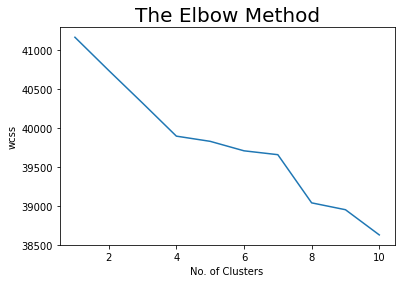

In [ ]:
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(y)
  wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(y)

In [ ]:
len(y_means)

988

In [ ]:
y['labels'] = y_means

In [ ]:
y

recipe_id        519       536       607       749       822      1005  \
user_id                                                                  
1535        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4439        5.667449  6.000000  5.667449  5.667449  5.667449  5.667449   
4470        1.000000  5.667449  5.667449  5.667449  5.667449  5.667449   
...              ...       ...       ...       ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1800054678  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   

recipe_id       1356      1985      2072      2496  ...    373346    376786  \
user_id                                             ...                       
1535        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4439        5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
4470        6.000000  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
...              ...       ...       ...       ...  ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
1800054678  6.000000  5.667449  5.667449  5.667449  ...  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  6.000000  ...  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  ...  5.667449  5.667449   

recipe_id     384800    385071    388397    400137    428004    428116  \
user_id                                                                  
1535        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
3288        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4291        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4439        5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
4470        5.667449  5.667449  5.667449  5.667449  5.667449  6.000000   
...              ...       ...       ...       ...       ...       ...   
2324285     5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2549237     5.667449  5.667449  5.667449  5.667449  5.667449  5.000000   
1800054678  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
1802849661  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   
2000431901  5.667449  5.667449  5.667449  5.667449  5.667449  5.667449   

recipe_id     429576  labels  
user_id                       
1535        5.667449       3  
3288        5.667449       7  
4291        5.667449       3  
4439        5.667449       7  
4470        5.667449       3  
...              ...     ...  
2324285     5.667449       3  
2549237     5.667449       7  
1800054678  5.667449       3  
1802849661  5.667449       3  
2000431901  5.667449       3  

[988 rows x 1697 columns]

In [ ]:
print("--------------------------------------------")
cluster1 = y[y["labels"]==0]
print('Number of users in 1st group (LABEL 0)=', len(cluster1))
print('They are -', cluster1.index)
print("--------------------------------------------")
cluster2 = y[y["labels"]==1]
print('Number of users in 2nd group (LABEL 1)=', len(cluster2))
print('They are -', cluster2.index)
print("--------------------------------------------")
cluster3 = y[y["labels"]==2]
print('Number of users in 3rd group (LABEL 2)=', len(cluster3))
print('They are -', cluster3.index)
print("--------------------------------------------")
cluster4 = y[y["labels"]==3]
print('Number of users in 4th group (LABEL 3)=', len(cluster4))
print('They are -', cluster4.index)
print("--------------------------------------------")
cluster5 = y[y["labels"]==4]
print('Number of users in 5th group (LABEL 4)=', len(cluster5))
print('They are -', cluster5.index)
print("--------------------------------------------")
cluster6 = y[y["labels"]==5]
print('Number of users in 6th group (LABEL 5)=', len(cluster6))
print('They are -', cluster6.index)
print("--------------------------------------------")
cluster7 = y[y["labels"]==6]
print('Number of users in 7th group (LABEL 6)=', len(cluster7))
print('They are -', cluster7.index)
print("--------------------------------------------")
cluster8 = y[y["labels"]==7]
print('Number of users in 8th group (LABEL 7)=', len(cluster8))
print('They are -', cluster8.index)
print("--------------------------------------------")

--------------------------------------------
Number of users in 1st group (LABEL 0)= 3
They are - Int64Index([135887, 348437, 424494], dtype='int64', name='user_id')
--------------------------------------------
Number of users in 2nd group (LABEL 1)= 1
They are - Int64Index([673444], dtype='int64', name='user_id')
--------------------------------------------
Number of users in 3rd group (LABEL 2)= 1
They are - Int64Index([218535], dtype='int64', name='user_id')
--------------------------------------------
Number of users in 4th group (LABEL 3)= 871
They are - Int64Index([      1535,       4291,       4470,       4740,       5060,
                  6258,       6357,       6651,       6836,       7108,
            ...
               1376400,    1506604,    1636470,    1701315,    2041603,
               2123645,    2324285, 1800054678, 1802849661, 2000431901],
           dtype='int64', name='user_id', length=871)
--------------------------------------------
Number of users in 5th group (

In [ ]:
data["Cluster num"] = y_means
data.head(10)

user_id  recipe_id  rating  labels  Cluster num
694     6357      98783       6       0            0
698   138861      98783       6       0            0
699   206722      98783       6       0            0
700    39194      98783       6       0            0
701    55380      98783       6       0            0
704   102058      98783       6       0            0
705   202661      98783       6       0            0
707   144431      98783       6       0            0
713   158087      98783       6       0            0
714   152393      98783       5       3            3

In [ ]:
data.groupby('Cluster num').mean()

user_id     recipe_id    rating  labels
Cluster num                                              
0            5.749375e+06  83847.751408  6.000000     0.0
1            6.632016e+06  70194.101356  3.802466     1.0
2            7.661752e+06  78443.028721  1.161880     2.0
3            6.729870e+06  80094.063981  5.000000     3.0

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(y, y['labels'])
print("-------------------EVALUATION METRICS-------------------------")
print('Silhouette score =', silhouette_score)


-------------------EVALUATION METRICS-------------------------
Silhouette score = 0.2849287674546252


#K-MEANS rating matrix media UserxUser


In [ ]:
app

recipe_id     519       536       607       749       822       1005    \
user_id                                                                  
1535        5.717391  5.717391  5.717391  5.717391  5.717391  5.717391   
3288        5.206897  5.206897  5.206897  5.206897  5.206897  5.206897   
4291        5.740741  5.740741  5.740741  5.740741  5.740741  5.740741   
4439        5.735294  5.735294  5.735294  5.735294  5.735294  5.735294   
4470        5.896552  5.896552  5.896552  5.896552  5.896552  5.896552   
...              ...       ...       ...       ...       ...       ...   
2324285     5.478261  5.478261  5.478261  5.478261  5.478261  5.478261   
2549237     5.052632  5.052632  5.052632  5.052632  5.052632  5.052632   
1800054678  5.871795  5.871795  5.871795  5.871795  5.871795  5.871795   
1802849661  5.666667  5.666667  5.666667  5.666667  5.666667  5.666667   
2000431901  5.111111  5.111111  5.111111  5.111111  5.111111  5.111111   

recipe_id     1356      1985      2072      2496    ...    367414    373346  \
user_id                                             ...                       
1535        5.717391  5.717391  5.717391  5.717391  ...  5.717391  5.717391   
3288        5.206897  5.206897  5.206897  5.206897  ...  5.206897  5.206897   
4291        5.740741  5.740741  5.740741  5.740741  ...  5.740741  5.740741   
4439        5.735294  5.735294  5.735294  5.735294  ...  5.735294  5.735294   
4470        5.896552  5.896552  5.896552  5.896552  ...  5.896552  5.896552   
...              ...       ...       ...       ...  ...       ...       ...   
2324285     5.478261  5.478261  5.478261  5.478261  ...  5.478261  5.478261   
2549237     5.052632  5.052632  5.052632  5.052632  ...  5.052632  5.052632   
1800054678  5.871795  5.871795  5.871795  5.871795  ...  5.871795  5.871795   
1802849661  5.666667  5.666667  5.666667  5.666667  ...  5.666667  5.666667   
2000431901  5.111111  5.111111  5.111111  5.111111  ...  5.111111  5.111111   

recipe_id     376786    384800    385071    388397    400137    428004  \
user_id                                                                  
1535        5.717391  5.717391  5.717391  5.717391  5.717391  5.717391   
3288        5.206897  5.206897  5.206897  5.206897  5.206897  5.206897   
4291        5.740741  5.740741  5.740741  5.740741  5.740741  5.740741   
4439        5.735294  5.735294  5.735294  5.735294  5.735294  5.735294   
4470        5.896552  5.896552  5.896552  5.896552  5.896552  5.896552   
...              ...       ...       ...       ...       ...       ...   
2324285     5.478261  5.478261  5.478261  5.478261  5.478261  5.478261   
2549237     5.052632  5.052632  5.052632  5.052632  5.052632  5.052632   
1800054678  5.871795  5.871795  5.871795  5.871795  5.871795  5.871795   
1802849661  5.666667  5.666667  5.666667  5.666667  5.666667  5.666667   
2000431901  5.111111  5.111111  5.111111  5.111111  5.111111  5.111111   

recipe_id     428116    429576  
user_id                         
1535        5.717391  5.717391  
3288        5.206897  5.206897  
4291        5.740741  5.740741  
4439        5.735294  5.735294  
4470        6.000000  5.896552  
...              ...       ...  
2324285     5.478261  5.478261  
2549237     5.000000  5.052632  
1800054678  5.871795  5.871795  
1802849661  5.666667  5.666667  
2000431901  5.111111  5.111111  

[988 rows x 1696 columns]

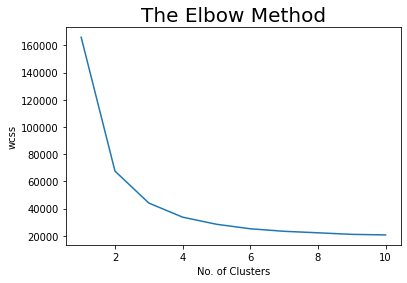

In [ ]:
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(app)
  wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
app_means = km.fit_predict(app)

In [ ]:
app['labels'] = app_means

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(app, app['labels'])
print("-------------------EVALUATION METRICS-------------------------")
print('Silhouette score =', silhouette_score)

-------------------EVALUATION METRICS-------------------------
Silhouette score = 0.43793856870592535


In [ ]:
app_means

array([1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,

#K-MEANS rating matrix media RatingxRating


In [ ]:
app2 =  pd.pivot_table(df, values='rating', index='user_id', columns='recipe_id', fill_value=0.1)
app2

recipe_id   519     536     607     749     822     1005    1356    1985    \
user_id                                                                      
1535           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
3288           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
4291           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
4439           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
4470           0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285        0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
2549237        0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
1800054678     0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
1802849661     0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   
2000431901     0.1     0.1     0.1     0.1     0.1     0.1     0.1     0.1   

recipe_id   2072    2496    ...  367414  373346  376786  384800  385071  \
user_id                     ...                                           
1535           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
3288           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
4291           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
4439           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
4470           0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2324285        0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
2549237        0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
1800054678     0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
1802849661     0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   
2000431901     0.1     0.1  ...     0.1     0.1     0.1     0.1     0.1   

recipe_id   388397  400137  428004  428116  429576  
user_id                                             
1535           0.1     0.1     0.1     0.1     0.1  
3288           0.1     0.1     0.1     0.1     0.1  
4291           0.1     0.1     0.1     0.1     0.1  
4439           0.1     0.1     0.1     0.1     0.1  
4470           0.1     0.1     0.1     6.0     0.1  
...            ...     ...     ...     ...     ...  
2324285        0.1     0.1     0.1     0.1     0.1  
2549237        0.1     0.1     0.1     5.0     0.1  
1800054678     0.1     0.1     0.1     0.1     0.1  
1802849661     0.1     0.1     0.1     0.1     0.1  
2000431901     0.1     0.1     0.1     0.1     0.1  

[988 rows x 1696 columns]

In [ ]:
med2 = pd.pivot_table(df, index='recipe_id', fill_value=0)
med2

rating        user_id
recipe_id                         
519        5.916667  221472.000000
536        5.000000  176219.916667
607        5.625000  285883.937500
749        5.846154  350766.615385
822        5.600000  207575.333333
...             ...            ...
388397     5.750000  333860.083333
400137     5.800000  300235.300000
428004     5.555556  324721.000000
428116     5.625000  467668.312500
429576     5.857143  300482.142857

[1696 rows x 2 columns]

In [ ]:
for recipe in app2.columns:
  med2.loc[recipe] = 0
  n = 0
  for user in app2.index:
    if app2.loc[user][recipe] != 0.1:
      n = n + 1
      med2.loc[recipe] += app2.loc[user][recipe]
  med2.loc[recipe] = med2.loc[recipe] / n

In [ ]:
med2

rating   user_id
recipe_id                    
519        5.916667  5.916667
536        5.000000  5.000000
607        5.625000  5.625000
749        5.846154  5.846154
822        5.600000  5.600000
...             ...       ...
388397     5.750000  5.750000
400137     5.800000  5.800000
428004     5.555556  5.555556
428116     5.625000  5.625000
429576     5.857143  5.857143

[1696 rows x 2 columns]

In [ ]:
for recipe in app2.columns:
  for user in app2.index:
    if app2.loc[user][recipe] == 0.1:
      app2.loc[user][recipe] = med2.loc[recipe].rating

In [ ]:
app2

recipe_id     519     536     607       749     822       1005      1356    \
user_id                                                                      
1535        5.916667     5.0   5.625  5.846154     5.6  4.933333  5.736842   
3288        5.916667     5.0   5.625  5.846154     5.6  4.933333  5.736842   
4291        5.916667     5.0   5.625  5.846154     5.6  4.933333  5.736842   
4439        5.916667     5.0   5.625  5.846154     5.6  4.933333  5.736842   
4470        5.916667     5.0   5.625  5.846154     5.6  4.933333  5.736842   
...              ...     ...     ...       ...     ...       ...       ...   
2324285     5.916667     5.0   5.625  5.846154     5.6  4.933333  5.736842   
2549237     5.916667     5.0   5.625  5.846154     5.6  4.933333  5.736842   
1800054678  5.916667     5.0   5.625  5.846154     5.6  4.933333  5.736842   
1802849661  5.916667     5.0   5.625  5.846154     5.6  4.933333  5.736842   
2000431901  5.916667     5.0   5.625  5.846154     5.6  4.933333  5.736842   

recipe_id   1985      2072      2496    ...  367414  373346    376786  \
user_id                                 ...                             
1535         5.875  5.352941  5.916667  ...     5.0     6.0  5.842105   
3288         5.875  5.352941  5.916667  ...     5.0     6.0  5.842105   
4291         5.875  5.352941  5.916667  ...     5.0     6.0  5.842105   
4439         5.875  5.352941  5.916667  ...     5.0     6.0  5.842105   
4470         5.875  5.352941  5.916667  ...     5.0     6.0  5.842105   
...            ...       ...       ...  ...     ...     ...       ...   
2324285      5.875  5.352941  5.916667  ...     5.0     6.0  5.842105   
2549237      5.875  5.352941  5.916667  ...     5.0     6.0  5.842105   
1800054678   5.875  5.352941  5.916667  ...     5.0     6.0  5.842105   
1802849661   5.875  5.352941  5.916667  ...     5.0     6.0  5.842105   
2000431901   5.875  5.352941  5.916667  ...     5.0     6.0  5.842105   

recipe_id     384800    385071  388397  400137    428004  428116    429576  
user_id                                                                     
1535        5.636364  5.857143    5.75     5.8  5.555556   5.625  5.857143  
3288        5.636364  5.857143    5.75     5.8  5.555556   5.625  5.857143  
4291        5.636364  5.857143    5.75     5.8  5.555556   5.625  5.857143  
4439        5.636364  5.857143    5.75     5.8  5.555556   5.625  5.857143  
4470        5.636364  5.857143    5.75     5.8  5.555556   6.000  5.857143  
...              ...       ...     ...     ...       ...     ...       ...  
2324285     5.636364  5.857143    5.75     5.8  5.555556   5.625  5.857143  
2549237     5.636364  5.857143    5.75     5.8  5.555556   5.000  5.857143  
1800054678  5.636364  5.857143    5.75     5.8  5.555556   5.625  5.857143  
1802849661  5.636364  5.857143    5.75     5.8  5.555556   5.625  5.857143  
2000431901  5.636364  5.857143    5.75     5.8  5.555556   5.625  5.857143  

[988 rows x 1696 columns]

In [ ]:
app2.to_csv('/content/drive/MyDrive/Food.com/rating_matrixRxR.csv')

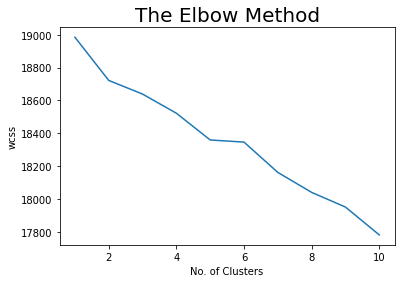

In [ ]:
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(app2)
  wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
app2_means = km.fit_predict(app2)

In [ ]:
app2['labels'] = app2_means

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(app2, app2['labels'])
print("-------------------EVALUATION METRICS-------------------------")
print('Silhouette score =', silhouette_score)

-------------------EVALUATION METRICS-------------------------
Silhouette score = 0.33890574622050973


####NLTK

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dataframe = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
dataframe

recipe_id   519     536     607     749     822     1005    1356    1985    \
user_id                                                                      
1535             0       0       0       0       0       0       0       0   
3288             0       0       0       0       0       0       0       0   
4291             0       0       0       0       0       0       0       0   
4439             0       6       0       0       0       0       0       0   
4470             1       0       0       0       0       0       6       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          0       0       0       0       0       0       0       0   
2549237          0       0       0       0       0       0       0       0   
1800054678       0       0       0       0       0       0       6       0   
1802849661       0       0       0       0       0       0       0       0   
2000431901       0       0       0       0       0       0       0       0   

recipe_id   2072    2496    ...  367414  373346  376786  384800  385071  \
user_id                     ...                                           
1535             0       0  ...       0       0       0       0       0   
3288             0       0  ...       0       0       0       0       0   
4291             0       0  ...       0       0       0       0       0   
4439             0       0  ...       0       0       0       0       0   
4470             0       0  ...       0       0       0       0       0   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2324285          0       0  ...       0       0       0       0       0   
2549237          0       0  ...       0       0       0       0       0   
1800054678       0       0  ...       0       0       0       0       0   
1802849661       0       6  ...       0       0       0       0       0   
2000431901       0       0  ...       0       0       0       0       0   

recipe_id   388397  400137  428004  428116  429576  
user_id                                             
1535             0       0       0       0       0  
3288             0       0       0       0       0  
4291             0       0       0       0       0  
4439             0       0       0       0       0  
4470             0       0       0       6       0  
...            ...     ...     ...     ...     ...  
2324285          0       0       0       0       0  
2549237          0       0       0       5       0  
1800054678       0       0       0       0       0  
1802849661       0       0       0       0       0  
2000431901       0       0       0       0       0  

[988 rows x 1696 columns]

In [ ]:
import nltk 
from nltk.cluster.util import VectorSpaceClusterer
from nltk import cluster
from nltk.cluster import euclidean_distance
from numpy import array
from nltk.cluster import KMeansClusterer, euclidean_distance

N_CLUSTER = 7
kclusterer = KMeansClusterer(N_CLUSTER, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(dataframe.to_numpy(), assign_clusters=True)
print(assigned_clusters)

[3, 4, 3, 4, 1, 4, 5, 1, 2, 4, 2, 0, 3, 3, 4, 4, 5, 2, 0, 3, 4, 5, 1, 1, 4, 4, 0, 2, 4, 4, 2, 2, 5, 5, 6, 1, 0, 4, 3, 1, 3, 4, 4, 4, 2, 3, 5, 4, 2, 4, 1, 5, 4, 0, 4, 5, 4, 6, 4, 4, 6, 1, 2, 4, 5, 2, 1, 5, 4, 4, 4, 2, 1, 4, 2, 4, 5, 2, 0, 4, 4, 3, 4, 2, 4, 5, 5, 2, 6, 2, 4, 4, 4, 4, 2, 1, 1, 4, 5, 2, 5, 2, 4, 4, 5, 3, 2, 5, 0, 2, 0, 5, 4, 1, 2, 5, 0, 4, 5, 5, 4, 6, 5, 4, 4, 2, 0, 0, 0, 5, 5, 5, 4, 4, 5, 4, 5, 2, 4, 5, 1, 2, 5, 1, 0, 4, 5, 3, 4, 5, 1, 2, 5, 4, 0, 0, 4, 2, 5, 3, 0, 2, 0, 2, 5, 6, 5, 4, 3, 4, 3, 0, 2, 3, 4, 3, 4, 3, 4, 5, 5, 4, 6, 0, 5, 4, 1, 2, 3, 4, 5, 2, 6, 6, 0, 1, 3, 4, 4, 4, 6, 6, 5, 6, 0, 2, 0, 2, 5, 6, 2, 3, 4, 1, 3, 1, 0, 4, 2, 1, 4, 5, 6, 2, 2, 3, 4, 3, 3, 6, 4, 5, 5, 1, 4, 3, 6, 6, 2, 3, 3, 4, 2, 0, 2, 1, 3, 3, 4, 5, 6, 0, 4, 4, 3, 3, 0, 4, 2, 4, 5, 6, 0, 1, 4, 5, 2, 1, 4, 3, 6, 1, 6, 4, 4, 2, 1, 3, 4, 5, 6, 4, 1, 3, 4, 4, 4, 5, 1, 4, 4, 0, 4, 4, 4, 2, 5, 0, 3, 4, 4, 6, 2, 4, 5, 0, 3, 4, 3, 2, 2, 2, 5, 5, 5, 5, 2, 4, 5, 2, 5, 2, 3, 4, 3, 6, 5, 5, 6, 0, 5, 0, 0, 

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(dataframe, assigned_clusters)
print("-------------------EVALUATION METRICS-------------------------")
print('Silhouette score =', silhouette_score)


-------------------EVALUATION METRICS-------------------------
Silhouette score = -0.03862906952865485


##Top n items

5. Creare per ogni utente la lista degli n items da consigliare (es. considerando il rating predetto).


In [ ]:
rating_matrix = pd.read_csv('/content/drive/MyDrive/Food.com/rating_matrix.csv', header=0)

In [ ]:
rating_matrix = rating_matrix.set_index('user_id')

In [ ]:
rating_matrix

519  536  607  749  822  1005  1356  1985  2072  2496  ...  \
user_id                                                            ...   
1535          5    5    5    5    5     5     5     5     5     5  ...   
3288          5    5    5    5    5     5     5     5     5     5  ...   
4291          5    5    5    5    5     5     5     5     5     5  ...   
4439          5    6    5    5    5     5     5     5     5     5  ...   
4470          1    5    5    5    5     5     6     5     5     5  ...   
...         ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...   
2324285       5    5    5    5    5     5     5     5     5     5  ...   
2549237       5    5    5    5    5     5     5     5     5     5  ...   
1800054678    5    5    5    5    5     5     6     5     5     5  ...   
1802849661    5    5    5    5    5     5     5     5     5     6  ...   
2000431901    5    5    4    5    5     4     4     5     5     4  ...   

            367414  373346  376786  384800  385071  388397  400137  428004  \
user_id                                                                      
1535             5       5       5       5       5       5       5       5   
3288             5       5       5       5       5       5       5       5   
4291             5       5       5       5       5       5       5       5   
4439             5       5       5       5       5       5       5       5   
4470             5       6       6       5       6       6       5       5   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          5       5       5       5       5       5       5       5   
2549237          5       5       5       5       5       5       5       5   
1800054678       5       5       5       5       5       5       5       5   
1802849661       5       5       5       5       5       5       5       5   
2000431901       5       5       5       4       5       5       5       5   

            428116  429576  
user_id                     
1535             5       5  
3288             5       5  
4291             5       5  
4439             5       5  
4470             6       6  
...            ...     ...  
2324285          5       5  
2549237          5       5  
1800054678       5       5  
1802849661       5       5  
2000431901       5       5  

[988 rows x 1696 columns]

In [ ]:
n = 10 #Numero di ricette da consigliare per ogni utente

In [ ]:
A = []
for i in range(n): #Per avere un range da 1 a n
  A.append(i)
A

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
rm = pd.DataFrame(index=rating_matrix.index, columns=A)

In [ ]:
rm

0    1    2    3    4    5    6    7    8    9
user_id                                                     
1535        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3288        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4291        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4439        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4470        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2324285     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2549237     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1800054678  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1802849661  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000431901  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[988 rows x 10 columns]

In [ ]:
tmp = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
for user in rating_matrix.index:
  lst = rating_matrix.loc[user]
  lst = lst.sort_values(ascending=False)
  top = 0
  while top <= n:
    recipe = lst.index[0]
    if tmp.loc[user][int(recipe)]==0:
      rm.loc[user][top] = recipe
      top = top + 1
    lst = lst.drop(recipe)

In [ ]:
rm

0       1       2       3       4      5       6       7  \
user_id                                                                     
1535        100408  100417   95606   95823   95416  95311   95808   95222   
3288        101104   99570   99476   99430   99272  99156   99103   99086   
4291         99156   99272   99103   99430   99476  98869   99570   99086   
4439        100526  100513  100480  100474  100417  95416  100408  100005   
4470         69214   55556   56652   57062   57772  58823   59148   59311   
...            ...     ...     ...     ...     ...    ...     ...     ...   
2324285      99272  100005   99870   99843   99709  99570   99476   99430   
2549237      98415   98370   97831   97523   97764  97589   97573   97531   
1800054678   90674   18725   57679   40983  137370  27733   35805    9327   
1802849661   99156   98724   99272   98447   98636  98867   98844   99103   
2000431901  109884   94031   94964   94624  111212  94532   94528   94520   

                8       9  
user_id                    
1535        95711   96514  
3288        98869  102073  
4291          519   99709  
4439        99870   95311  
4470        54715   53876  
...           ...     ...  
2324285     95808   94211  
2549237     97496   97439  
1800054678   8739   71933  
1802849661  99086   98869  
2000431901  94469   93886  

[988 rows x 10 columns]

##Matrix Factorization

6. Filling della matrice di rating attraverso Matrix Factorization in aggiunta a K-NN e confronto dei
risultati ottenuti in termini di MSE e RMSE.

<img src=https://miro.medium.com/max/1200/1*b4M7o7W8bfRRxdMxtFoVBQ.png>

Semplicemente riempiamo la matrice dei rating invece dei KNN usiamo SVD

###SVD

In [ ]:
df = intr

In [ ]:
from surprise import SVD

In [ ]:
# Convert the pandas DataFrame into surprise dataset format
reader = Reader(rating_scale=(1, 6))
df_surprise = Dataset.load_from_df(df[['user_id', 'recipe_id', 'rating']], reader)

In [ ]:
# Initialize the algorithm
algoSVD = SVD()

In [ ]:
# Split the dataset into train and test set
trainset, testset = train_test_split(df_surprise, test_size=0.2)

In [ ]:
# Train and test the algorithm
algoSVD.fit(trainset)
predictions = algoSVD.test(testset)
# Compute metrics
mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

MSE: 0.6067
RMSE: 0.7789


In [ ]:
kfold_result = cross_validate(algoSVD, df_surprise, cv=5, measures=['mse', 'rmse'], verbose=True)

Evaluating MSE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MSE (testset)     0.6461  0.6100  0.5990  0.6024  0.6085  0.6132  0.0169  
RMSE (testset)    0.8038  0.7811  0.7740  0.7761  0.7800  0.7830  0.0107  
Fit time          2.61    0.89    0.89    0.87    0.86    1.23    0.69    
Test time         0.18    0.08    0.20    0.09    0.08    0.13    0.05    


In [ ]:
# Define the grid of parameters (this depends on the algorithms)
param_grid = {
    'n_epochs': np.arange(5,45,5), 
    'lr_all': [0.002, 0.005],
    'reg_all': [0.4, 0.6]
}

# Initialize and train the Grid Search
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mse"], cv=5, n_jobs = 1)
gs.fit(df_surprise)

In [ ]:
# best MSE score
print(f'Best MSE = {gs.best_score["mse"]:.4f}')
# best MSE score
print(f'Best RMSE = {gs.best_score["rmse"]:.4f}')
# combination of parameters that gave the best RMSE score
print(f'Best configuration = {gs.best_params["rmse"]}')

Best MSE = 0.5993
Best RMSE = 0.7741
Best configuration = {'n_epochs': 30, 'lr_all': 0.002, 'reg_all': 0.4}


In [ ]:
from surprise.dataset import DatasetAutoFolds
#Il dataset abbiamo detto essere df_surprise

# Retrieve the trainset.
trainset = df_surprise.build_full_trainset()
testset = trainset.build_anti_testset()

#testset = DatasetAutoFolds(reader=reader, df=df[['user_id', 'recipe_id', 'rating']])
#testset = testset.build_full_trainset()
#testset = trainset.build_anti_testset()

# Build an algorithm, and train it.
algoSVD = SVD(n_epochs=30, lr_all=0.002, reg_all=0.4)
algoSVD.fit(trainset)

In [ ]:
pred = algoSVD.test(testset)

In [ ]:
rating_matrixSVD = pd.pivot_table(df, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
for user in rating_matrixSVD.index:
  for recipe in rating_matrixSVD.columns:
    if rating_matrixSVD.loc[user][recipe] == 0:
      rating_matrixSVD.loc[user][recipe] = algoSVD.predict(user, recipe).est

In [ ]:
rating_matrixSVD

recipe_id   519     536     607     749     822     1005    1356    1985    \
user_id                                                                      
1535             5       5       5       5       5       5       5       5   
3288             5       5       5       5       5       5       5       5   
4291             5       5       5       5       5       5       5       5   
4439             5       6       5       5       5       5       5       5   
4470             1       5       5       5       5       5       6       5   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          5       5       5       5       5       5       5       5   
2549237          5       5       5       5       5       5       5       5   
1800054678       5       5       5       5       5       5       6       5   
1802849661       5       5       5       5       5       5       5       5   
2000431901       5       4       5       5       5       5       5       5   

recipe_id   2072    2496    ...  367414  373346  376786  384800  385071  \
user_id                     ...                                           
1535             5       5  ...       5       5       5       5       5   
3288             5       5  ...       5       5       5       5       5   
4291             5       5  ...       5       5       5       5       5   
4439             5       5  ...       5       5       5       5       5   
4470             5       5  ...       5       5       5       5       5   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2324285          5       5  ...       5       5       5       5       5   
2549237          5       5  ...       5       5       5       5       5   
1800054678       5       5  ...       5       5       5       5       5   
1802849661       5       6  ...       5       5       5       5       5   
2000431901       5       5  ...       5       5       5       5       5   

recipe_id   388397  400137  428004  428116  429576  
user_id                                             
1535             5       5       5       5       5  
3288             5       5       5       5       5  
4291             5       5       5       5       5  
4439             5       5       5       5       5  
4470             5       5       5       6       5  
...            ...     ...     ...     ...     ...  
2324285          5       5       5       5       5  
2549237          5       5       5       5       5  
1800054678       5       5       5       5       5  
1802849661       5       5       5       5       5  
2000431901       5       5       5       5       5  

[988 rows x 1696 columns]

In [ ]:
#rating_matrixSVD.to_csv('/content/drive/MyDrive/Food.com/rating_matrixSVD.csv')

In [ ]:
prova = pd.read_csv('/content/drive/MyDrive/Food.com/rating_matrixSVD.csv')

In [ ]:
prova = prova.set_index('user_id')

In [ ]:
prova

519  536  607  749  822  1005  1356  1985  2072  2496  ...  \
user_id                                                            ...   
1535          5    5    5    5    5     5     5     5     5     5  ...   
3288          5    5    5    5    5     5     5     5     5     5  ...   
4291          5    5    5    5    5     5     5     5     5     5  ...   
4439          5    6    5    5    5     5     5     5     5     5  ...   
4470          1    5    5    5    5     5     6     5     5     5  ...   
...         ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...   
2324285       5    5    5    5    5     5     5     5     5     5  ...   
2549237       5    5    5    5    5     5     5     5     5     5  ...   
1800054678    5    5    5    5    5     5     6     5     5     5  ...   
1802849661    5    5    5    5    5     5     5     5     5     6  ...   
2000431901    5    4    5    5    5     5     5     5     5     5  ...   

            367414  373346  376786  384800  385071  388397  400137  428004  \
user_id                                                                      
1535             5       5       5       5       5       5       5       5   
3288             5       5       5       5       5       5       5       5   
4291             5       5       5       5       5       5       5       5   
4439             5       5       5       5       5       5       5       5   
4470             5       5       5       5       5       5       5       5   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2324285          5       5       5       5       5       5       5       5   
2549237          5       5       5       5       5       5       5       5   
1800054678       5       5       5       5       5       5       5       5   
1802849661       5       5       5       5       5       5       5       5   
2000431901       5       5       5       5       5       5       5       5   

            428116  429576  
user_id                     
1535             5       5  
3288             5       5  
4291             5       5  
4439             5       5  
4470             6       5  
...            ...     ...  
2324285          5       5  
2549237          5       5  
1800054678       5       5  
1802849661       5       5  
2000431901       5       5  

[988 rows x 1696 columns]

In [ ]:
prova.loc[1535]['1356']

5

###Varianti SVD

In [ ]:
algo1 = surprise.prediction_algorithms.matrix_factorization.SVDpp()

In [ ]:
trainset, testset = train_test_split(df_surprise, test_size=0.2)

In [ ]:
algo1.fit(trainset)
predictions = algo1.test(testset)
# Compute metrics
mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

MSE: 1.1364
RMSE: 1.0660


Rating matrix 


In [ ]:
df['rating'] = df['rating'] + 1

In [ ]:
df

user_id  recipe_id  rating
694         6357      98783       6
698       138861      98783       6
699       206722      98783       6
700        39194      98783       6
701        55380      98783       6
...          ...        ...     ...
1131666   985795      31311       6
1131668   407007      31311       6
1131672  1376928      31311       6
1131675   119956      31311       4
1131678   143318      31311       6

[98744 rows x 3 columns]

In [ ]:
rating_matrix = pd.pivot_table(df, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
rating_matrix

recipe_id   246     519     536     607     632     749     822     860     \
user_id                                                                      
1535             0       0       0       0       0       0       0       0   
2310             0       0       0       0       0       0       0       0   
2586             0       0       0       0       0       0       0       0   
3288             0       0       0       0       0       0       0       0   
4291             0       0       0       0       0       0       0       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1802849661       0       0       0       0       0       0       0       0   
2000391889       0       0       0       0       0       0       0       0   
2000431901       0       0       0       0       0       0       0       0   
2001102678       0       0       0       0       0       0       0       0   
2001362355       0       0       0       0       0       0       0       0   

recipe_id   916     1005    ...  400137  400513  413122  428004  428116  \
user_id                     ...                                           
1535             0       0  ...       0       0       0       0       0   
2310             0       0  ...       0       0       0       0       0   
2586             0       0  ...       0       0       0       0       0   
3288             0       0  ...       0       0       0       0       0   
4291             0       0  ...       0       0       0       0       0   
...            ...     ...  ...     ...     ...     ...     ...     ...   
1802849661       0       0  ...       0       0       0       0       0   
2000391889       0       0  ...       0       0       0       0       0   
2000431901       0       0  ...       0       0       0       0       0   
2001102678       0       0  ...       0       0       0       0       0   
2001362355       0       0  ...       0       0       0       0       0   

recipe_id   429576  432490  441862  454644  456890  
user_id                                             
1535             0       0       0       0       0  
2310             0       0       0       0       0  
2586             0       0       0       0       0  
3288             0       0       0       0       0  
4291             0       0       0       0       0  
...            ...     ...     ...     ...     ...  
1802849661       0       0       0       0       0  
2000391889       0       0       0       0       0  
2000431901       0       0       0       0       0  
2001102678       0       0       0       0       0  
2001362355       0       0       0       0       0  

[1965 rows x 2343 columns]

In [ ]:
rating_matrix.loc[1376928][31311]

6

In [ ]:
for user in users['user_id']:
  for recipe in recipes['recipe_id']:
    if rating_matrix.loc[user][recipe] == 0:
      rating_matrix.loc[user][recipe] = algo.predict(user, recipe).est

In [ ]:
rating_matrix

recipe_id   246     519     536     607     632     749     822     860     \
user_id                                                                      
1535             6       6       6       6       6       6       6       6   
2310             6       6       6       6       6       6       6       6   
2586             6       6       6       6       6       6       6       6   
3288             6       6       5       6       6       6       6       6   
4291             6       6       6       6       6       6       6       6   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1802849661       6       6       6       6       6       6       6       6   
2000391889       6       6       5       6       6       6       6       5   
2000431901       6       6       5       6       6       6       6       5   
2001102678       6       6       6       6       6       6       6       6   
2001362355       6       6       6       6       6       6       6       6   

recipe_id   916     1005    ...  400137  400513  413122  428004  428116  \
user_id                     ...                                           
1535             6       6  ...       6       6       6       6       6   
2310             6       6  ...       6       6       6       6       6   
2586             6       6  ...       6       6       6       6       6   
3288             5       6  ...       6       6       6       6       6   
4291             6       6  ...       6       6       6       6       6   
...            ...     ...  ...     ...     ...     ...     ...     ...   
1802849661       6       6  ...       6       6       6       6       6   
2000391889       6       6  ...       6       6       6       6       6   
2000431901       5       6  ...       6       6       6       6       6   
2001102678       6       6  ...       6       6       6       6       6   
2001362355       6       6  ...       6       6       6       6       6   

recipe_id   429576  432490  441862  454644  456890  
user_id                                             
1535             6       6       6       6       6  
2310             6       6       6       6       6  
2586             6       6       6       6       6  
3288             6       6       6       6       6  
4291             6       6       6       6       6  
...            ...     ...     ...     ...     ...  
1802849661       6       6       6       6       6  
2000391889       6       6       6       5       6  
2000431901       6       6       6       6       6  
2001102678       6       6       6       6       6  
2001362355       6       6       6       6       6  

[1965 rows x 2343 columns]

In [ ]:
rating_matrix.to_csv('/content/drive/MyDrive/Food.com/rating_matrixsvd.csv')

In [ ]:
z = []
for i in range(5): 
  z.append(i)
z


[0, 1, 2, 3, 4]

In [ ]:
recipes

recipe_id
694          98783
910         152116
1408        135585
1564         12572
1651        139213
...            ...
1127918      86644
1129222      99870
1129235      43072
1129541      38966
1131533      31311

[2343 rows x 1 columns]

In [ ]:
df

user_id  recipe_id  rating  labels
694         6357      98783       6       1
698       138861      98783       6       1
699       206722      98783       6       1
700        39194      98783       6       1
701        55380      98783       6       1
...          ...        ...     ...     ...
1131666   985795      31311       6       1
1131668   407007      31311       6       1
1131672  1376928      31311       6       1
1131675   119956      31311       4       2
1131678   143318      31311       6       1

[98744 rows x 4 columns]

In [ ]:
df[df['recipe_id'] == 98783]

user_id  recipe_id  rating  labels
694     6357      98783       6       1
698   138861      98783       6       1
699   206722      98783       6       1
700    39194      98783       6       1
701    55380      98783       6       1
704   102058      98783       6       1
705   202661      98783       6       1
707   144431      98783       6       1
713   158087      98783       6       1
714   152393      98783       5       0
717   106867      98783       4       2
718   110433      98783       6       1
723   231054      98783       6       1
725   189616      98783       6       1
726   469903      98783       6       1
729   226066      98783       6       1
730   537188      98783       4       2
736   544026      98783       5       0
737    13483      98783       6       1
739    97780      98783       4       2
744   274467      98783       6       1
747    87236      98783       6       1
749   688566      98783       6       1
756   222564      98783       6       1
761   140132      98783       6       1

In [ ]:
a = [1,2,3,4,5]
c = [0,9,8,7,7]
d = True
for i in range(1,5):
    print(i)

1
2
3
4


In [ ]:
n = 5
for user in users['user_id']:
    max_n = np.zeros(n)
    i = 0
    for j in range (1, 7):
      for recipe in recipes['recipe_id']:
        if rating_matrix.loc[user][recipe] == 7-j:
          max_n[i] = recipe
          i = i + 1
        if i == n:
          break
      if i == n:
        i = 0
        break
    print(max_n)


      

    


[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[98783. 54269. 95068. 17186. 99361.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[152116. 135585.  12572. 139213.   8507.]
[152116. 135585.  12572. 139213.   8507.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[152116. 135585.  12572. 139213.   8507.]
[152116. 135585.  12572. 139213.   8507.]
[ 98783. 152116. 135585.  12572. 139213.]
[152116. 135585.  12572. 139213.   8507.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213.]
[ 98783. 152116. 135585.  12572. 139213

#Multi objective optimization - Collaborative Filtering

##Initialization


In [ ]:
!pip install pymoo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 KB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210096 sha256=a0284f55d57994508d2cbca4888518240eb3eece0c957e3d83b026ae3a557723
  Stored in directory: /root/.cache/pip/wheels/2d/08/6b/126ea9009f7482fd53a78d0db2ece5aca70af8f4a30445386b
Successfully built grapheme


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd

# Algorithms
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.sms import SMSEMOA

# Core classes
from pymoo.core.callback import Callback
from pymoo.core.crossover import Crossover
from pymoo.core.evaluator import Evaluator
from pymoo.core.individual import Individual
from pymoo.core.mutation import Mutation
from pymoo.core.population import Population
from pymoo.core.problem import ElementwiseProblem, Problem
from pymoo.core.repair import Repair
from pymoo.core.sampling import Sampling
from pymoo.core.termination import NoTermination

# Performance metrics
from pymoo.indicators.hv import HV

# Genetic operator
from pymoo.operators.crossover.expx import ExponentialCrossover
from pymoo.operators.crossover.hux import HalfUniformCrossover
from pymoo.operators.crossover.pntx import  PointCrossover, SinglePointCrossover, TwoPointCrossover
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.sampling.lhs import LHS
from pymoo.operators.sampling.rnd import BinaryRandomSampling, FloatRandomSampling
from pymoo.operators.selection.rnd import RandomSelection
from pymoo.operators.selection.tournament import TournamentSelection

# Optimization interface
from pymoo.optimize import minimize

# Problem utilities
from pymoo.problems import get_problem
from pymoo.problems.many.dtlz import DTLZ1
from pymoo.problems.functional import FunctionalProblem
from pymoo.problems.static import StaticProblem

# Operator utilities
from pymoo.operators.repair.rounding import RoundingRepair

# Termination criterion
from pymoo.termination import get_termination
from pymoo.termination.default import DefaultMultiObjectiveTermination, DefaultSingleObjectiveTermination
from pymoo.termination.ftol import MultiObjectiveSpaceTermination
from pymoo.termination.robust import RobustTermination
from pymoo.termination.xtol import DesignSpaceTermination

# General utilities
from pymoo.util import plotting
from pymoo.util.plotting import plot
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.util.remote import Remote

# Plotting utilities
from pymoo.visualization.fitness_landscape import FitnessLandscape
from pymoo.visualization.heatmap import Heatmap
from pymoo.visualization.scatter import Scatter
from pymoo.visualization.petal import Petal
from pymoo.visualization.pcp import PCP
from pymoo.visualization.radar import Radar

Il nadir è il peggiore dei due obiettivi, se sto minimizzando sarà il massimo tra i due obiettivi. L'ideal è il migliore

##1. Formulazione del problema multi-obiettivo (accuratezza, novelty e coverage) per creare la lista degli n items da raccomandare per ogni utente.


####Idea Base

:The expected results is a recommendation matrix like  
<img src='https://drive.google.com/uc?id=1UHhYcP7eT2K7PkDQer4R6_cq4qDxOj8Y' width=50%>

The three objective are  
<img src='https://drive.google.com/uc?id=1Isls9Pip6VxpWRO0Ge8D3AZBSl2FdX1v' width=40%>  
where f1 is the accuracy, f2 the coverage and f3 the novelty.  
Note that: 
* M is the number of user
* N is the number of item
* L is the number of item to recommend to each user
* S_L(u_i) is the i-th row of the recommendation matrix
* N_j = log_2 (M/d_j), where d_j is the degree of item j, i.e., the number of times item d_j has been rated.

**Tips:**
* The filled rating matrix is all you need to compute this three objectives.
* The recommendation matrix are the individual of the population
* N_j can be pre-computed and stored somewhere to make the optimization process easier and faster.
* Using the `ElementWiseProblem` formulation make the coding of the objective functions easier.

In [ ]:
rating_matrix = pd.read_csv('/content/drive/MyDrive/Food.com/rating_matrixSVD.csv')
rating_matrix = rating_matrix.set_index('user_id')

In [ ]:
rating_matrix = rating_matrix.iloc[:50, :]
rating_matrix

519  536  607  749  822  1005  1356  1985  2072  2496  ...  367414  \
user_id                                                         ...           
1535       5    5    5    5    5     5     5     5     5     5  ...       5   
3288       5    5    5    5    5     5     5     5     5     5  ...       5   
4291       5    5    5    5    5     5     5     5     5     5  ...       5   
4439       5    6    5    5    5     5     5     5     5     5  ...       5   
4470       1    5    5    5    5     5     6     5     5     5  ...       5   
4740       5    5    5    5    5     5     5     5     5     5  ...       5   
5060       5    5    5    5    5     5     5     5     5     5  ...       5   
6258       5    5    5    5    5     5     6     5     5     5  ...       5   
6357       5    5    5    5    5     5     5     5     5     5  ...       5   
6651       5    5    5    6    5     5     5     5     5     5  ...       5   
6836       5    5    5    5    5     5     5     5     5     5  ...       5   
7108       5    5    5    6    5     5     5     5     5     5  ...       5   
8629       5    5    5    5    5     5     5     5     5     5  ...       5   
8688       5    5    5    5    5     5     5     5     5     6  ...       5   
9579       5    5    5    5    5     5     5     5     5     5  ...       5   
9717       5    5    5    5    5     5     5     5     5     5  ...       5   
9748       5    5    5    5    5     5     5     5     5     5  ...       5   
9869       5    5    5    5    5     5     5     5     5     5  ...       5   
10033      6    5    5    5    5     5     5     5     5     6  ...       5   
10404      5    5    5    5    5     5     5     6     5     6  ...       5   
11009      5    5    5    5    5     5     5     5     5     5  ...       5   
11176      5    5    5    5    5     5     5     5     5     5  ...       5   
11297      5    5    5    5    5     5     5     5     5     5  ...       5   
11461      5    5    5    5    5     5     5     5     5     5  ...       5   
13483      5    5    6    5    5     5     5     6     5     6  ...       5   
13593      5    5    5    6    5     5     5     6     5     6  ...       5   
13796      5    5    5    5    5     5     5     5     5     5  ...       5   
15521      5    5    5    5    5     5     5     5     5     5  ...       5   
15851      5    5    5    5    5     5     5     5     5     5  ...       5   
17803      5    6    5    5    5     5     5     5     5     5  ...       5   
18391      5    5    5    5    5     5     5     5     5     5  ...       5   
18745      5    5    5    5    5     5     5     5     5     5  ...       5   
19198      5    5    5    5    5     5     5     5     5     5  ...       5   
20371      5    5    5    5    5     5     5     5     5     5  ...       5   
20480      5    5    5    5    5     5     5     6     5     6  ...       5   
20754      5    5    5    5    5     5     5     5     5     5  ...       5   
21752      5    5    5    5    5     5     5     5     5     5  ...       5   
22015      5    5    5    5    5     5     5     5     5     6  ...       5   
22655      5    4    5    5    5     5     6     5     5     5  ...       5   
23333      5    5    5    5    5     5     5     5     5     5  ...       5   
24386      5    5    5    5    5     5     5     5     5     5  ...       5   
25063      5    5    5    5    5     5     5     5     5     5  ...       5   
25455      5    5    5    5    5     5     5     5     5     5  ...       5   
25792      5    5    5    5    5     5     5     6     5     6  ...       5   
25941      5    5    5    5    5     5     5     5     5     5  ...       5   
26075      5    5    5    5    5     5     5     5     5     5  ...       5   
26512      5    5    5    5    5     5     5     5     5     5  ...       5   
27395      5    5    5    5    5     5     5     5     5     5  ...       5   
27416      5    5    5    5    5     5     5     5     5   

In [ ]:
matrix = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
matrix = matrix.iloc[:50, :]
matrix

recipe_id  519     536     607     749     822     1005    1356    1985    \
user_id                                                                     
1535            0       0       0       0       0       0       0       0   
3288            0       0       0       0       0       0       0       0   
4291            0       0       0       0       0       0       0       0   
4439            0       6       0       0       0       0       0       0   
4470            1       0       0       0       0       0       6       0   
4740            0       0       0       0       0       0       0       0   
5060            0       0       0       0       0       0       0       0   
6258            0       0       0       0       0       0       6       5   
6357            0       0       0       0       5       0       0       0   
6651            0       0       0       6       0       0       0       0   
6836            0       0       0       0       0       0       0       0   
7108            0       0       0       6       0       0       0       0   
8629            0       0       0       0       0       0       0       0   
8688            0       0       0       0       0       0       0       0   
9579            0       0       0       0       0       0       0       0   
9717            0       0       0       0       0       0       0       0   
9748            0       0       0       0       0       0       0       0   
9869            0       0       0       0       0       0       0       0   
10033           6       0       0       0       0       0       0       0   
10404           0       0       0       0       0       0       0       0   
11009           0       0       0       0       0       0       0       0   
11176           0       0       0       0       0       0       0       0   
11297           0       0       0       0       0       0       0       0   
11461           0       0       0       0       0       0       0       0   
13483           0       0       6       0       0       0       0       6   
13593           0       0       0       0       0       0       0       0   
13796           0       0       0       0       0       0       0       0   
15521           0       0       0       0       0       0       0       0   
15851           0       0       0       0       0       0       0       0   
17803           0       6       0       0       0       0       0       0   
18391           0       0       0       0       0       0       0       0   
18745           0       0       0       0       0       0       0       0   
19198           0       0       0       0       0       0       0       0   
20371           0       0       0       0       0       0       0       0   
20480           0       0       0       0       0       0       0       0   
20754           0       0       0       0       0       0       0       0   
21752           0       0       0       0       0       0       0       0   
22015           0       0       0       0       0       0       0       0   
22655           0       0       0       0       0       0       6       0   
23333           0       0       0       0       0       0       0       0   
24386           0       0       0       0       0       0       0       0   
25063           0       0       0       0       0       0       0       0   
25455           0       0       0       0       0       0       0       0   
25792           0       0       0       0       0       0       0       0   
25941           0       0       0       0       0       0       0       0   
26075           0       0       0       0       0       0       0       0   
26512           0       0       0       0       0       0       0       0   
27395           0       0       0       0       0       0       0       0   
27416           0       0       0       0       0       0       0       0   
27643           0       0       0       0       0       0       0       0

Matrice in cui la cella è 1 se la ricetta è stata consigliata all'utente, 0 altrimenti

In [ ]:
#Numero degli utenti
M = len(rating_matrix.index)

In [ ]:
#Numero delle ricette
N = len(rating_matrix.columns)

In [ ]:
#Numero delle ricette da consigliare a ciascun utente
L = 10

####Funzioni

In [ ]:
def func1(x):
  value = 0
  i = 0
  for user in rating_matrix.index:
    j = 0
    for recipe in rating_matrix.columns: #S_L(u_i)
      if x[i, j] == 1:
        value = value + rating_matrix.loc[user][recipe]
      j = j + 1
    i = i + 1
  return value/(M*L)

In [ ]:
def func2(x):
  app = []
  i = 0
  for user in rating_matrix.index:
    j = 0
    for recipe in rating_matrix.columns:
      if x[i, j] == 1:
        app.append(recipe)
      j = j + 1
    i = i + 1
  app = set(app)
  return len(app)/N

In [ ]:
def func3(x):
  value = 0
  i = 0
  for user in rating_matrix.index:
    j = 0
    for recipe in rating_matrix.columns: #S_L(u_i)
      if x[i, j] == 1:
        dj = len(intr[intr['recipe_id'] == int(recipe)])
        nj = np.log2(M/dj)
        value = value + (nj/L)
      j = j + 1
    i = i + 1
  return value/M

####Genetic Functions

In [ ]:
class OptimizationProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=M*N, n_obj=3, n_constr=0, xl=np.zeros(M*N), xu=np.ones(M*N))

    def _evaluate(self, x, out, *args, **kwargs):
        
        x = np.matrix(x.reshape((M, N)))

        f1 = -func1(x)
        f2 = -func2(x)
        f3 = -func3(x)

        out["F"] = [f1, f2, f3]


# create the actual problem to be solved
problem = OptimizationProblem()

Per analizzare l'indice dell'utente corrispettivo nella matrice dei rating, devo contare a gruppi di N in N. Esempio: N il primo utente, 2N il secondo utente e così via

#####Provissima

In [ ]:
from pymoo.core.sampling import Sampling
class MySampling (Sampling):
  def _do (self, problem:OptimizationProblem, n_samples: int, **kwargs):
    X = np.full((n_samples, problem.n_var), False, dtype=bool)
    for k in range(n_samples):
      for i in range(M):
        I = np.random.permutation(N)
        I = I[matrix.iloc[i, I] == 0]
        I = I[:L]
        X[k, i*N+I] = True
    return X

In [ ]:
from pymoo.core.crossover import Crossover
class BinaryCrossover(Crossover):
  def __init__(self):
    super().__init__(2, 1)

  def _do(self, problem, X, **kwargs):
    n_parents, n_matings, n_var = X.shape

    _X = np.full((self.n_offsprings, n_matings, problem.n_var), False)

    for k in range(n_matings):
      p1, p2 = X[0, k], X[1, k]

      both_are_true = np.logical_and(p1, p2)
      are_different = np.logical_xor(p1, p2)

      _X[0, k, both_are_true] = True
      for i in range(M):
        n_remaining = L - np.sum(both_are_true[i*N:(i+1)*N])
        S = np.random.permutation(np.where(are_different[i*N:(i+1)*N])[0])[:n_remaining]
        S += i*N
        _X[0, k, S] = True
      return _X

In [ ]:
from pymoo.core.mutation import Mutation
class MyMutation(Mutation):
  def _do(self, problem:OptimizationProblem, X, **kwargs):
    for i in range(X.shape[0]):
      X[i, :] = X[i, :]
      oldX = X[i, :].copy()
      n_users_to_mutate = np.random.randint(max(1, M*0.20))
      for _ in range(n_users_to_mutate):
        user = np.random.randint(M)
        is_true = np.where(X[i, user*N:(user+1)*N])[0]
        is_false = np.where(np.logical_and(np.logical_not(X[i, user*N:(user+1)*N]), matrix.iloc[user, :] != 0))[0]
        if len(is_true) != 0:
          change_to_true = np.random.choice(is_false) + user*N
          change_to_false = np.random.choice(is_true) + user*N
          X[i, change_to_true] = True
          X[i, change_to_false] = False
        if np.sum(oldX) != np.sum(X[i]):
          print(np.sum(oldX), np.sum(X[i]), change_to_true, change_to_false)
    return X

#####Resto

In [ ]:
algorithm = NSGA2(pop_size=80,
               offspring=2,
               sampling=MySampling(),
               crossover=BinaryCrossover(),
               mutation=MyMutation(),
               eliminate_duplicates=True)

res_nsga = minimize(problem,
               algorithm,
               ('n_gen', 50),
               seed=1,
               verbose=True)

print("Function value: %s" % res_nsga.F[0])
#print("Subset:", np.where(res.X)[0])

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       80 |      8 |             - |             -
     2 |      160 |     24 |  1.0000000000 |         ideal
     3 |      240 |     25 |  0.4285714286 |         ideal
     4 |      320 |     22 |  0.3000000000 |         ideal
     5 |      400 |     27 |  0.2307692308 |         ideal
     6 |      480 |     24 |  0.1851851852 |         ideal
     7 |      560 |     25 |  0.1481481481 |         ideal
     8 |      640 |     35 |  0.1250000000 |         ideal
     9 |      720 |     31 |  0.0588235294 |         ideal
    10 |      800 |     42 |  0.1500000000 |         ideal
    11 |      880 |     46 |  0.0909090909 |         ideal
    12 |      960 |     56 |  0.0638297872 |         ideal
    13 |     1040 |     55 |  0.0866904016 |         ideal
    14 |     1120 |     59 |  0.1132075472 |         ideal
    15 |     1200 |     57 |  0.1016949153 |         ideal
    16 |     1280 |     64 |  0.0483870968 |         ide

In [ ]:
X=res_nsga.X.copy()
X1 = np.matrix(X[0].reshape((M, N)))
tot=0
for i in range(0, M):
  cont=0
  for j in range(0, N):
    if X1[i, j] == 1:
      cont=cont+1
  if(cont!=10):
    print('riga', i, 'cont uni:', cont)
  tot=tot+cont
tot

NameError: ignored

In [ ]:
import joblib as jl
#jl.dump(value = res_nsga, filename = '/content/drive/MyDrive/Food.com/res_nsga')

res_prova = jl.load('/content/drive/MyDrive/Food.com/res_nsga')
res_prova

##2. Risoluzione del problema attraverso gli algoritmi MOEA/D e NSGA-II della libreria Pymoo.


In [ ]:
res_prova.F = -res_prova.F

In [ ]:
res_nsga.F = -res_nsga.F

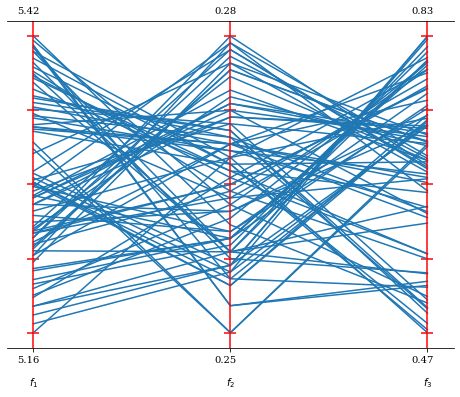

In [ ]:
PCP().add(res_prova.F).show()

####NSGA

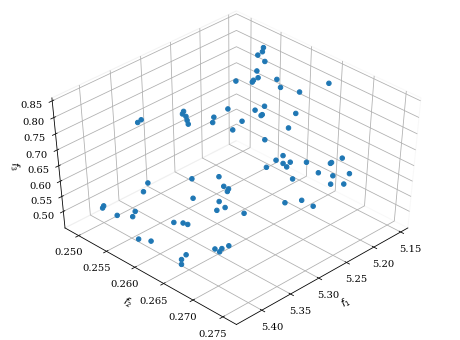

In [ ]:
Scatter().add(res_prova.F).show()

In [ ]:
ref_point = np.array([6, 2, 2])

ind = HV(ref_point=ref_point)
print("HV of true Pareto Front: ", ind(res_prova.F))

HV of true Pareto Front:  2.173750465550889


#####C-METRIC

In [ ]:
def is_dominated(sol, pf):
  for point in pf:
    if all(point <= sol) and any(point < sol):
      return True
  return False

def coverage(pf1, pf2):
  dominated = [is_dominated(point, pf1) for point in pf2]
  return sum(dominated) / len(dominated)

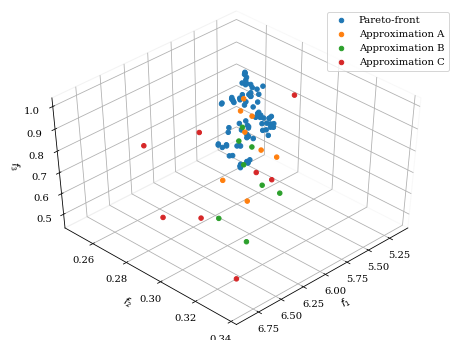

In [ ]:
# The result found by an algorithm
A = res_nsga.F[::10] * 1.1
B = res_nsga.F[::10] * 1.2
C = np.multiply(res_nsga.F[::10], np.random.uniform(low=1.0, high=1.3, size=res_nsga.F[::10].shape))

# plot the result
Scatter(legend=True).add(res_nsga.F, label="Pareto-front").add(A, label="Approximation A").add(B, label="Approximation B").add(C, label="Approximation C").show()

In [ ]:
print(f"C(A, B) = {coverage(A, B)}")
print(f"C(B, A) = {coverage(B, A)}\n")
print(f"C(A, C) = {coverage(A, C)}")
print(f"C(C, A) = {coverage(C, A)}\n")
print(f"C(B, C) = {coverage(B, C)}")
print(f"C(C, B) = {coverage(C, B)}")

C(A, B) = 1.0
C(B, A) = 0.0

C(A, C) = 0.625
C(C, A) = 0.25

C(B, C) = 0.125
C(C, B) = 1.0


####MOEA/D

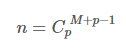

In [ ]:
from math import comb
n = comb(12+3-1,12)
n

91

In [ ]:
# In this case (M=3, p=12) -> n=91
ref_dirs = get_reference_directions("uniform", 3, n_partitions=12)

algorithm1 = MOEAD(
    ref_dirs,
    n_neighbors=5,
    prob_neighbor_mating=0.7,
    sampling=MySampling(),
    crossover=BinaryCrossover(),
    mutation=MyMutation(),
)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       91 |     11 |             - |             -
     2 |      182 |     26 |  0.5909090909 |         ideal
     3 |      273 |     22 |  0.7894736842 |         ideal
     4 |      364 |     19 |  0.4681953988 |         ideal
     5 |      455 |     46 |  0.5235201333 |         ideal
     6 |      546 |     46 |  0.2666666667 |         ideal
     7 |      637 |     32 |  0.2222222222 |         ideal
     8 |      728 |     46 |  0.2666666667 |         ideal
     9 |      819 |     17 |  1.2500000000 |         ideal
    10 |      910 |     20 |  0.6000000000 |         ideal
    11 |     1001 |     43 |  0.1578947368 |         ideal
    12 |     1092 |     29 |  0.6500000000 |         ideal
    13 |     1183 |     23 |  0.7000000000 |         ideal
    14 |     1274 |     23 |  0.5652173913 |         ideal
    15 |     1365 |     21 |  0.5714285714 |         ideal
    16 |     1456 |     26 |  0.4166666667 |         ide

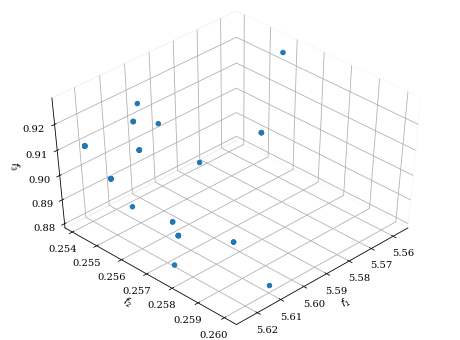

In [ ]:
res_moaed = minimize(problem,
               algorithm1,
               ('n_gen', 50),
               seed=1,
               verbose=True)

Scatter().add(-res_moaed.F).show()

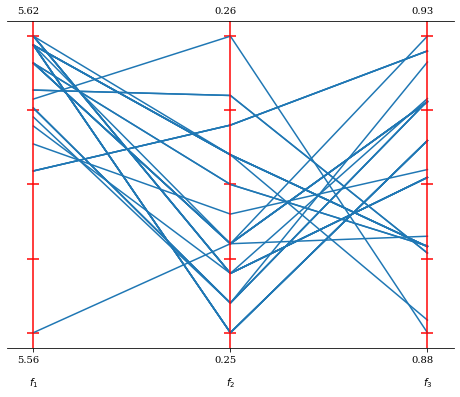

In [ ]:
PCP().add(-res_moaed.F).show()

In [ ]:
import joblib as jl
#jl.dump(value = res_moaed, filename = '/content/drive/MyDrive/Food.com/res_moaed')

res_prova1 = jl.load('/content/drive/MyDrive/Food.com/res_moaed')

#####Hypervolume

In [ ]:
from pymoo.indicators.hv import HV

ref_point = np.array([6, 2, 2])

ind = HV(ref_point=ref_point)
print("HV of true Pareto Front MOAED", ind(-res_prova.F))

HV of true Pareto Front MOAED 0.8592809940923787


#####C-METRIC

In [ ]:
def is_dominated(sol, pf):
  for point in pf:
    if all(point <= sol) and any(point < sol):
      return True
  return False

def coverage(pf1, pf2):
  dominated = [is_dominated(point, pf1) for point in pf2]
  return sum(dominated) / len(dominated)

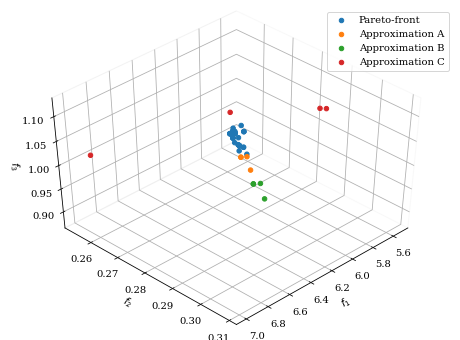

In [ ]:
# The result found by an algorithm
A = -res_moaed.F[::10] * 1.1
B = -res_moaed.F[::10] * 1.2
C = np.multiply(-res_moaed.F[::10], np.random.uniform(low=1.0, high=1.3, size=res_moaed.F[::10].shape))

# plot the result
Scatter(legend=True).add(-res_moaed.F, label="Pareto-front").add(A, label="Approximation A").add(B, label="Approximation B").add(C, label="Approximation C").show()

In [ ]:
print(f"C(NSGA-II, MOAE/D) = {coverage(res_prova1.F, res_prova.F)}")

C(NSGA-II, MOAE/D) = 0.375


In [ ]:
print(f"C(A, B) = {coverage(A, B)}")
print(f"C(B, A) = {coverage(B, A)}\n")
print(f"C(A, C) = {coverage(A, C)}")
print(f"C(C, A) = {coverage(C, A)}\n")
print(f"C(B, C) = {coverage(B, C)}")
print(f"C(C, B) = {coverage(C, B)}")

C(A, B) = 1.0
C(B, A) = 0.0

C(A, C) = 0.25
C(C, A) = 0.0

C(B, C) = 0.0
C(C, B) = 1.0


#Multi objective optimization - Content Based

##1. Formulazione del problema multi-obiettivo (accuratezza, novelty e coverage) per creare la lista degli n items da raccomandare per ogni utente.


####Idea Base

In [ ]:
rating_matrix = pd.read_csv('/content/drive/MyDrive/Food.com/rating_matrixCB.csv')
rating_matrix = rating_matrix.set_index('user_id')

In [ ]:
rating_matrix = rating_matrix.iloc[:40, :]
rating_matrix

519  536  607  749  822  1005  1356  1985  2072  2496  ...  367414  \
user_id                                                         ...           
1535       5    5    5    5    5     5     5     5     5     5  ...       5   
3288       5    5    5    5    5     5     5     5     5     5  ...       5   
4291       5    5    5    5    5     5     5     5     5     5  ...       5   
4439       5    6    5    5    5     5     5     5     5     5  ...       5   
4470       1    5    5    5    5     5     6     5     5     5  ...       5   
4740       5    5    5    5    5     5     5     5     5     5  ...       5   
5060       5    5    5    5    5     5     5     5     5     5  ...       5   
6258       5    5    5    5    5     5     6     5     5     5  ...       5   
6357       5    5    5    5    5     5     5     5     5     5  ...       5   
6651       5    5    5    6    5     5     5     5     5     5  ...       5   
6836       5    5    5    5    5     5     5     5     5     5  ...       5   
7108       5    5    5    6    5     5     5     5     5     5  ...       5   
8629       5    5    5    5    5     5     5     5     5     5  ...       5   
8688       5    5    5    5    5     5     5     5     5     6  ...       5   
9579       5    5    5    5    5     5     5     5     5     5  ...       5   
9717       5    5    5    5    5     5     5     5     5     5  ...       5   
9748       5    5    5    5    5     5     5     5     5     5  ...       5   
9869       5    5    5    5    5     5     5     5     5     5  ...       5   
10033      6    5    5    5    5     5     5     5     5     5  ...       5   
10404      5    5    5    5    5     5     5     5     5     5  ...       5   
11009      5    5    5    5    5     5     5     5     5     5  ...       5   
11176      5    5    5    5    5     5     5     5     5     5  ...       5   
11297      5    5    5    5    5     5     5     5     5     5  ...       5   
11461      5    5    5    5    5     5     5     5     5     5  ...       5   
13483      5    5    6    5    5     5     5     6     5     6  ...       5   
13593      5    5    5    5    5     5     5     5     5     5  ...       5   
13796      5    5    5    5    5     5     5     5     5     5  ...       5   
15521      5    5    5    5    5     5     5     5     5     5  ...       5   
15851      5    5    5    5    5     5     5     5     5     5  ...       5   
17803      5    6    5    5    5     5     5     5     5     5  ...       5   
18391      5    5    5    5    5     5     5     5     5     5  ...       5   
18745      6    6    6    6    6     6     6     6     6     6  ...       6   
19198      5    5    5    5    5     5     5     5     5     5  ...       5   
20371      5    5    5    5    5     5     5     5     5     5  ...       5   
20480      6    6    6    6    6     6     6     6     6     6  ...       6   
20754      5    5    5    5    5     5     5     5     5     5  ...       5   
21752      5    5    5    5    5     5     5     5     5     5  ...       5   
22015      5    5    5    5    5     5     5     5     5     6  ...       5   
22655      5    5    5    5    5     5     6     5     5     5  ...       5   
23333      5    5    5    5    5     5     5     5     5     5  ...       5   

         373346  376786  384800  385071  388397  400137  428004  428116  \
user_id                                                                   
1535          5       5       5       5       5       5       5       5   
3288          5       5       5       5       5       5       5       5   
4291          5       5       5       5       5       5       5       5   
4439          5       5       5       5       5       5       5       5   
4470          5       5       5       5       5       5       5       6   
4740          5       5       5       5       5       5       5       5   
5060          5       5       5       5       5       5       5       5   
6258          5

In [ ]:
matrix = pd.pivot_table(intr, values='rating', index='user_id', columns='recipe_id', fill_value=0)

In [ ]:
matrix = matrix.iloc[:40, :]
matrix

recipe_id  519     536     607     749     822     1005    1356    1985    \
user_id                                                                     
1535            0       0       0       0       0       0       0       0   
3288            0       0       0       0       0       0       0       0   
4291            0       0       0       0       0       0       0       0   
4439            0       6       0       0       0       0       0       0   
4470            1       0       0       0       0       0       6       0   
4740            0       0       0       0       0       0       0       0   
5060            0       0       0       0       0       0       0       0   
6258            0       0       0       0       0       0       6       5   
6357            0       0       0       0       5       0       0       0   
6651            0       0       0       6       0       0       0       0   
6836            0       0       0       0       0       0       0       0   
7108            0       0       0       6       0       0       0       0   
8629            0       0       0       0       0       0       0       0   
8688            0       0       0       0       0       0       0       0   
9579            0       0       0       0       0       0       0       0   
9717            0       0       0       0       0       0       0       0   
9748            0       0       0       0       0       0       0       0   
9869            0       0       0       0       0       0       0       0   
10033           6       0       0       0       0       0       0       0   
10404           0       0       0       0       0       0       0       0   
11009           0       0       0       0       0       0       0       0   
11176           0       0       0       0       0       0       0       0   
11297           0       0       0       0       0       0       0       0   
11461           0       0       0       0       0       0       0       0   
13483           0       0       6       0       0       0       0       6   
13593           0       0       0       0       0       0       0       0   
13796           0       0       0       0       0       0       0       0   
15521           0       0       0       0       0       0       0       0   
15851           0       0       0       0       0       0       0       0   
17803           0       6       0       0       0       0       0       0   
18391           0       0       0       0       0       0       0       0   
18745           0       0       0       0       0       0       0       0   
19198           0       0       0       0       0       0       0       0   
20371           0       0       0       0       0       0       0       0   
20480           0       0       0       0       0       0       0       0   
20754           0       0       0       0       0       0       0       0   
21752           0       0       0       0       0       0       0       0   
22015           0       0       0       0       0       0       0       0   
22655           0       0       0       0       0       0       6       0   
23333           0       0       0       0       0       0       0       0   

recipe_id  2072    2496    ...  367414  373346  376786  384800  385071  \
user_id                    ...                                           
1535            0       0  ...       0       0       0       0       0   
3288            0       0  ...       0       0       0       0       0   
4291            0       0  ...       0       0       0       0       0   
4439            0       0  ...       0       0       0       0       0   
4470            0       0  ...       0       0       0       0       0   
4740            0       0  ...       0       0       0       0       0   
5060            0       0  ...       0       0       0       0       0   
6258            0       0  ...       0       0       0       0       0   
6357            0       0

Matrice in cui la cella è 1 se la ricetta è stata consigliata all'utente, 0 altrimenti

In [ ]:
#Numero degli utenti
M = len(rating_matrix.index)

In [ ]:
#Numero delle ricette
N = len(rating_matrix.columns)

In [ ]:
#Numero delle ricette da consigliare a ciascun utente
L = 10

####Funzioni

In [ ]:
def func1(x):
  value = 0
  i = 0
  for user in rating_matrix.index:
    j = 0
    for recipe in rating_matrix.columns: #S_L(u_i)
      if x[i, j] == 1:
        value = value + rating_matrix.loc[user][recipe]
      j = j + 1
    i = i + 1
  return value/(M*L)

In [ ]:
def func2(x):
  app = []
  i = 0
  for user in rating_matrix.index:
    j = 0
    for recipe in rating_matrix.columns:
      if x[i, j] == 1:
        app.append(recipe)
      j = j + 1
    i = i + 1
  app = set(app)
  return len(app)/N

In [ ]:
def func3(x):
  value = 0
  i = 0
  for user in rating_matrix.index:
    j = 0
    for recipe in rating_matrix.columns: #S_L(u_i)
      if x[i, j] == 1:
        dj = len(intr[intr['recipe_id'] == int(recipe)])
        nj = np.log2(M/dj)
        value = value + (nj/L)
      j = j + 1
    i = i + 1
  return value/M

####Genetic Functions

In [ ]:
class OptimizationProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=M*N, n_obj=3, n_constr=0, xl=np.zeros(M*N), xu=np.ones(M*N))

    def _evaluate(self, x, out, *args, **kwargs):
        
        x = np.matrix(x.reshape((M, N)))

        f1 = -func1(x)
        f2 = -func2(x)
        f3 = -func3(x)

        #g1 = constraint1()

        out["F"] = [f1, f2, f3]
        #out["G"] = (self.n_max - np.sum(x)) ** 2


# create the actual problem to be solved
#np.random.seed(1)
problem = OptimizationProblem()

Per analizzare l'indice dell'utente corrispettivo nella matrice dei rating, devo contare a gruppi di N in N. Esempio: N il primo utente, 2N il secondo utente e così via

#####Provissima

In [ ]:
from pymoo.core.sampling import Sampling
class MySampling (Sampling):
  def _do (self, problem:OptimizationProblem, n_samples: int, **kwargs):
    X = np.full((n_samples, problem.n_var), False, dtype=bool)
    for k in range(n_samples):
      for i in range(M):
        I = np.random.permutation(N)
        I = I[matrix.iloc[i, I] == 0]
        I = I[:L]
        X[k, i*N+I] = True
    return X

In [ ]:
from pymoo.core.crossover import Crossover
class BinaryCrossover(Crossover):
  def __init__(self):
    super().__init__(2, 1)

  def _do(self, problem, X, **kwargs):
    n_parents, n_matings, n_var = X.shape

    _X = np.full((self.n_offsprings, n_matings, problem.n_var), False)

    for k in range(n_matings):
      p1, p2 = X[0, k], X[1, k]

      both_are_true = np.logical_and(p1, p2)
      are_different = np.logical_xor(p1, p2)

      _X[0, k, both_are_true] = True
      for i in range(M):
        n_remaining = L - np.sum(both_are_true[i*N:(i+1)*N])
        S = np.random.permutation(np.where(are_different[i*N:(i+1)*N])[0])[:n_remaining]
        S += i*N
        _X[0, k, S] = True
      return _X

In [ ]:
from pymoo.core.mutation import Mutation
class MyMutation(Mutation):
  def _do(self, problem:OptimizationProblem, X, **kwargs):
    for i in range(X.shape[0]):
      X[i, :] = X[i, :]
      oldX = X[i, :].copy()
      n_users_to_mutate = np.random.randint(max(1, M*0.20))
      for _ in range(n_users_to_mutate):
        user = np.random.randint(M)
        is_true = np.where(X[i, user*N:(user+1)*N])[0]
        is_false = np.where(np.logical_and(np.logical_not(X[i, user*N:(user+1)*N]), matrix.iloc[user, :] != 0))[0]
        if len(is_true) != 0:
          change_to_true = np.random.choice(is_false) + user*N
          change_to_false = np.random.choice(is_true) + user*N
          X[i, change_to_true] = True
          X[i, change_to_false] = False
        if np.sum(oldX) != np.sum(X[i]):
          print(np.sum(oldX), np.sum(X[i]), change_to_true, change_to_false)
    return X

#####Resto

In [ ]:
algorithm = NSGA2(pop_size=80,
               offspring=2,
               sampling=MySampling(),
               crossover=BinaryCrossover(),
               mutation=MyMutation(),
               eliminate_duplicates=True)

res_nsga = minimize(problem,
               algorithm,
               ('n_gen', 50),
               seed=1,
               verbose=True)

print("Function value: %s" % res_nsga.F[0])
#print("Subset:", np.where(res.X)[0])

KeyboardInterrupt: ignored

In [ ]:
X=res_nsga.X.copy()
X1 = np.matrix(X[0].reshape((M, N)))
tot=0
for i in range(0, M):
  cont=0
  for j in range(0, N):
    if X1[i, j] == 1:
      cont=cont+1
  if(cont!=10):
    print('riga', i, 'cont uni:', cont)
  tot=tot+cont
tot

400

In [ ]:
import joblib as jl
#l.dump(value = res_nsga, filename = '/content/drive/MyDrive/Food.com/res_nsga1')

res_prova = jl.load('/content/drive/MyDrive/Food.com/res_nsga1')

##2. Risoluzione del problema attraverso gli algoritmi MOEA/D e NSGA-II della libreria Pymoo.


In [ ]:
res_nsga.F = -res_nsga.F

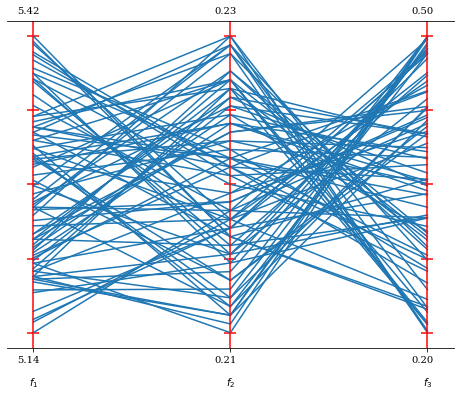

In [ ]:
PCP().add(-res_prova1.F).show()

####NSGA

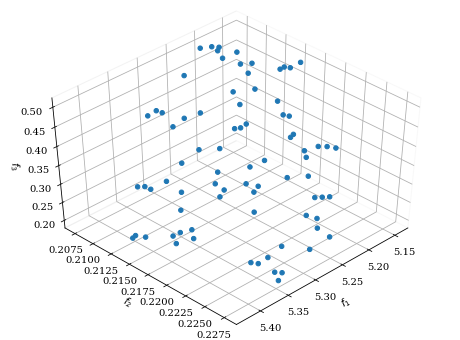

In [ ]:
Scatter().add(-res_prova1.F).show()

In [ ]:
ref_point = np.array([6, 2, 2])

ind = HV(ref_point=ref_point)
print("HV of true Pareto Front: ", ind(res_nsga.F))

HV of true Pareto Front:  2.7105853048487596


#####C-METRIC

In [ ]:
def is_dominated(sol, pf):
  for point in pf:
    if all(point <= sol) and any(point < sol):
      return True
  return False

def coverage(pf1, pf2):
  dominated = [is_dominated(point, pf1) for point in pf2]
  return sum(dominated) / len(dominated)

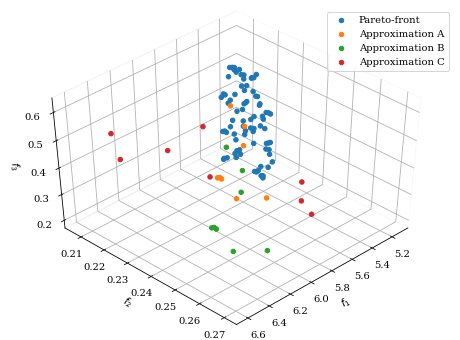

In [ ]:
# The result found by an algorithm
A = res_nsga.F[::10] * 1.1
B = res_nsga.F[::10] * 1.2
C = np.multiply(res_nsga.F[::10], np.random.uniform(low=1.0, high=1.3, size=res_nsga.F[::10].shape))

# plot the result
Scatter(legend=True).add(res_nsga.F, label="Pareto-front").add(A, label="Approximation A").add(B, label="Approximation B").add(C, label="Approximation C").show()

In [ ]:
print(f"C(A, B) = {coverage(A, B)}")
print(f"C(B, A) = {coverage(B, A)}\n")
print(f"C(A, C) = {coverage(A, C)}")
print(f"C(C, A) = {coverage(C, A)}\n")
print(f"C(B, C) = {coverage(B, C)}")
print(f"C(C, B) = {coverage(C, B)}")

C(A, B) = 1.0
C(B, A) = 0.0

C(A, C) = 0.25
C(C, A) = 0.375

C(B, C) = 0.125
C(C, B) = 1.0


####MOEA/D

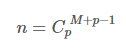

In [ ]:
from math import comb
n = comb(12+3-1,12)
n

91

In [ ]:
# In this case (M=3, p=12) -> n=91
ref_dirs = get_reference_directions("uniform", 3, n_partitions=12)

algorithm1 = MOEAD(
    ref_dirs,
    n_neighbors=5,
    prob_neighbor_mating=0.7,
    sampling=MySampling(),
    crossover=BinaryCrossover(),
    mutation=MyMutation(),
)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       91 |      6 |             - |             -
     2 |      182 |     23 |  1.0000000000 |         ideal
     3 |      273 |     34 |  0.5000000000 |         ideal
     4 |      364 |     24 |  0.7333333333 |         ideal
     5 |      455 |     36 |  0.5609441688 |         ideal
     6 |      546 |     41 |  0.0833333333 |         ideal
     7 |      637 |     46 |  0.4210526316 |         ideal
     8 |      728 |     32 |  0.0731707317 |         ideal
     9 |      819 |     34 |  0.1357272299 |         ideal
    10 |      910 |     44 |  0.2000000000 |         ideal
    11 |     1001 |     17 |  1.1818181818 |         ideal
    12 |     1092 |     19 |  0.2222222222 |         ideal
    13 |     1183 |     28 |  0.5833333333 |         ideal
    14 |     1274 |     31 |  0.3846153846 |         ideal
    15 |     1365 |     46 |  0.5600000000 |         ideal
    16 |     1456 |     34 |  0.1666666667 |         ide

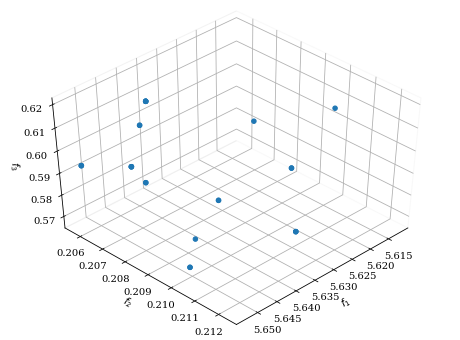

In [ ]:
res_moaed = minimize(problem,
               algorithm1,
               ('n_gen', 50),
               seed=1,
               verbose=True)

Scatter().add(-res_moaed.F).show()

In [ ]:
res_prova.F = -res_prova.F

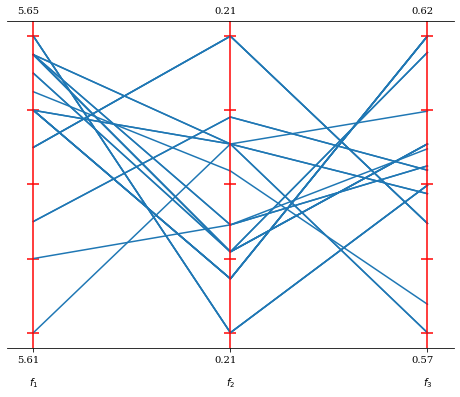

In [ ]:
PCP().add(res_prova.F).show()

#####Hypervolume

In [ ]:
from pymoo.indicators.hv import HV

ref_point = np.array([6, 2, 2])

ind = HV(ref_point=ref_point)
print("HV of true Pareto Front", ind(res_moaed.F))

HV of true Pareto Front 0.9935439578226695


#####C-METRIC

In [ ]:
def is_dominated(sol, pf):
  for point in pf:
    if all(point <= sol) and any(point < sol):
      return True
  return False

def coverage(pf1, pf2):
  dominated = [is_dominated(point, pf1) for point in pf2]
  return sum(dominated) / len(dominated)

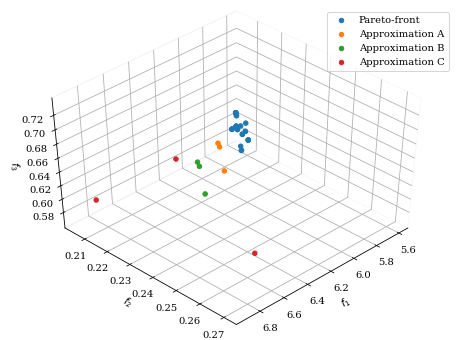

In [ ]:
# The result found by an algorithm
A = -res_moaed.F[::10] * 1.1
B = -res_moaed.F[::10] * 1.2
C = np.multiply(-res_moaed.F[::10], np.random.uniform(low=1.0, high=1.3, size=res_moaed.F[::10].shape))

# plot the result
Scatter(legend=True).add(-res_moaed.F, label="Pareto-front").add(A, label="Approximation A").add(B, label="Approximation B").add(C, label="Approximation C").show()

In [ ]:
print(f"C(NSGA-II, MOAE/D) = {coverage(res_moaed.F, res_prova.F)}")

C(NSGA-II, MOAE/D) = 0.1875


In [ ]:
print(f"C(A, B) = {coverage(A, B)}")
print(f"C(B, A) = {coverage(B, A)}\n")
print(f"C(A, C) = {coverage(A, C)}")
print(f"C(C, A) = {coverage(C, A)}\n")
print(f"C(B, C) = {coverage(B, C)}")
print(f"C(C, B) = {coverage(C, B)}")

C(A, B) = 1.0
C(B, A) = 0.0

C(A, C) = 0.6666666666666666
C(C, A) = 0.0

C(B, C) = 0.0
C(C, B) = 0.0
